<a href="https://colab.research.google.com/github/amandascholze/Data_Sci/blob/main/Scholze_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

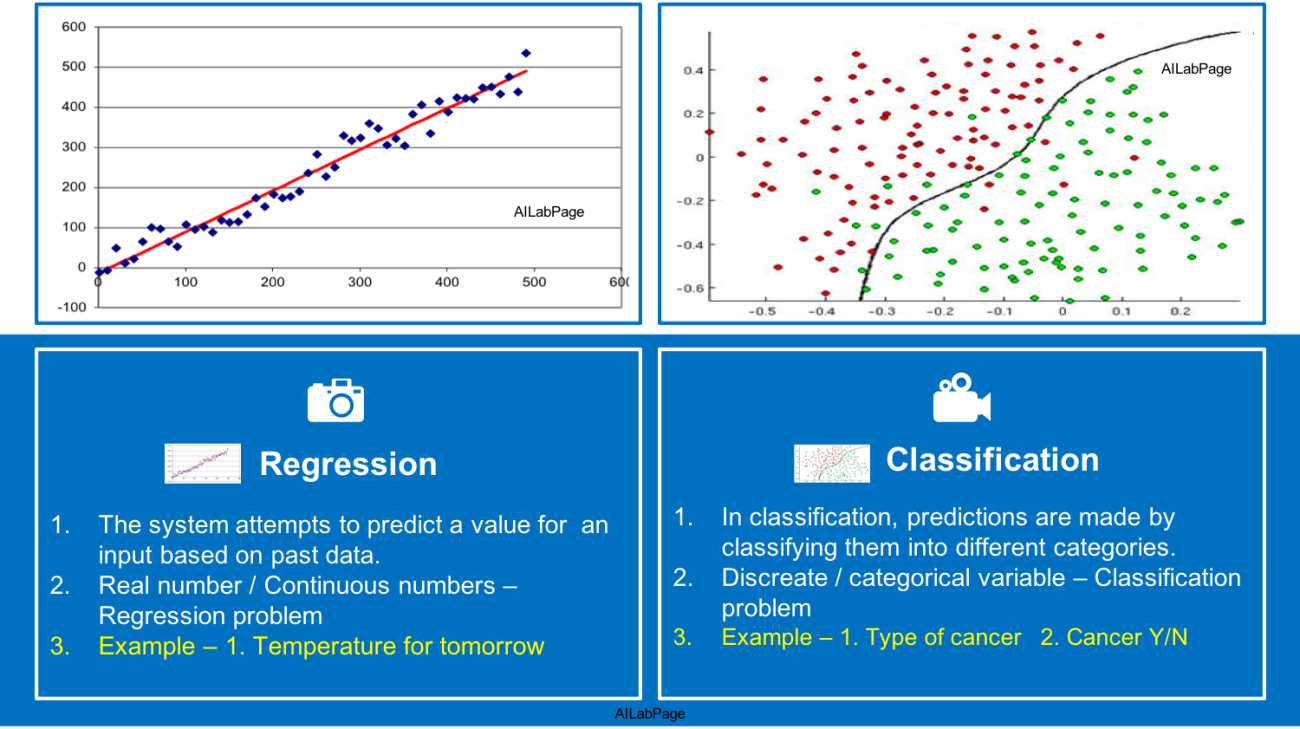

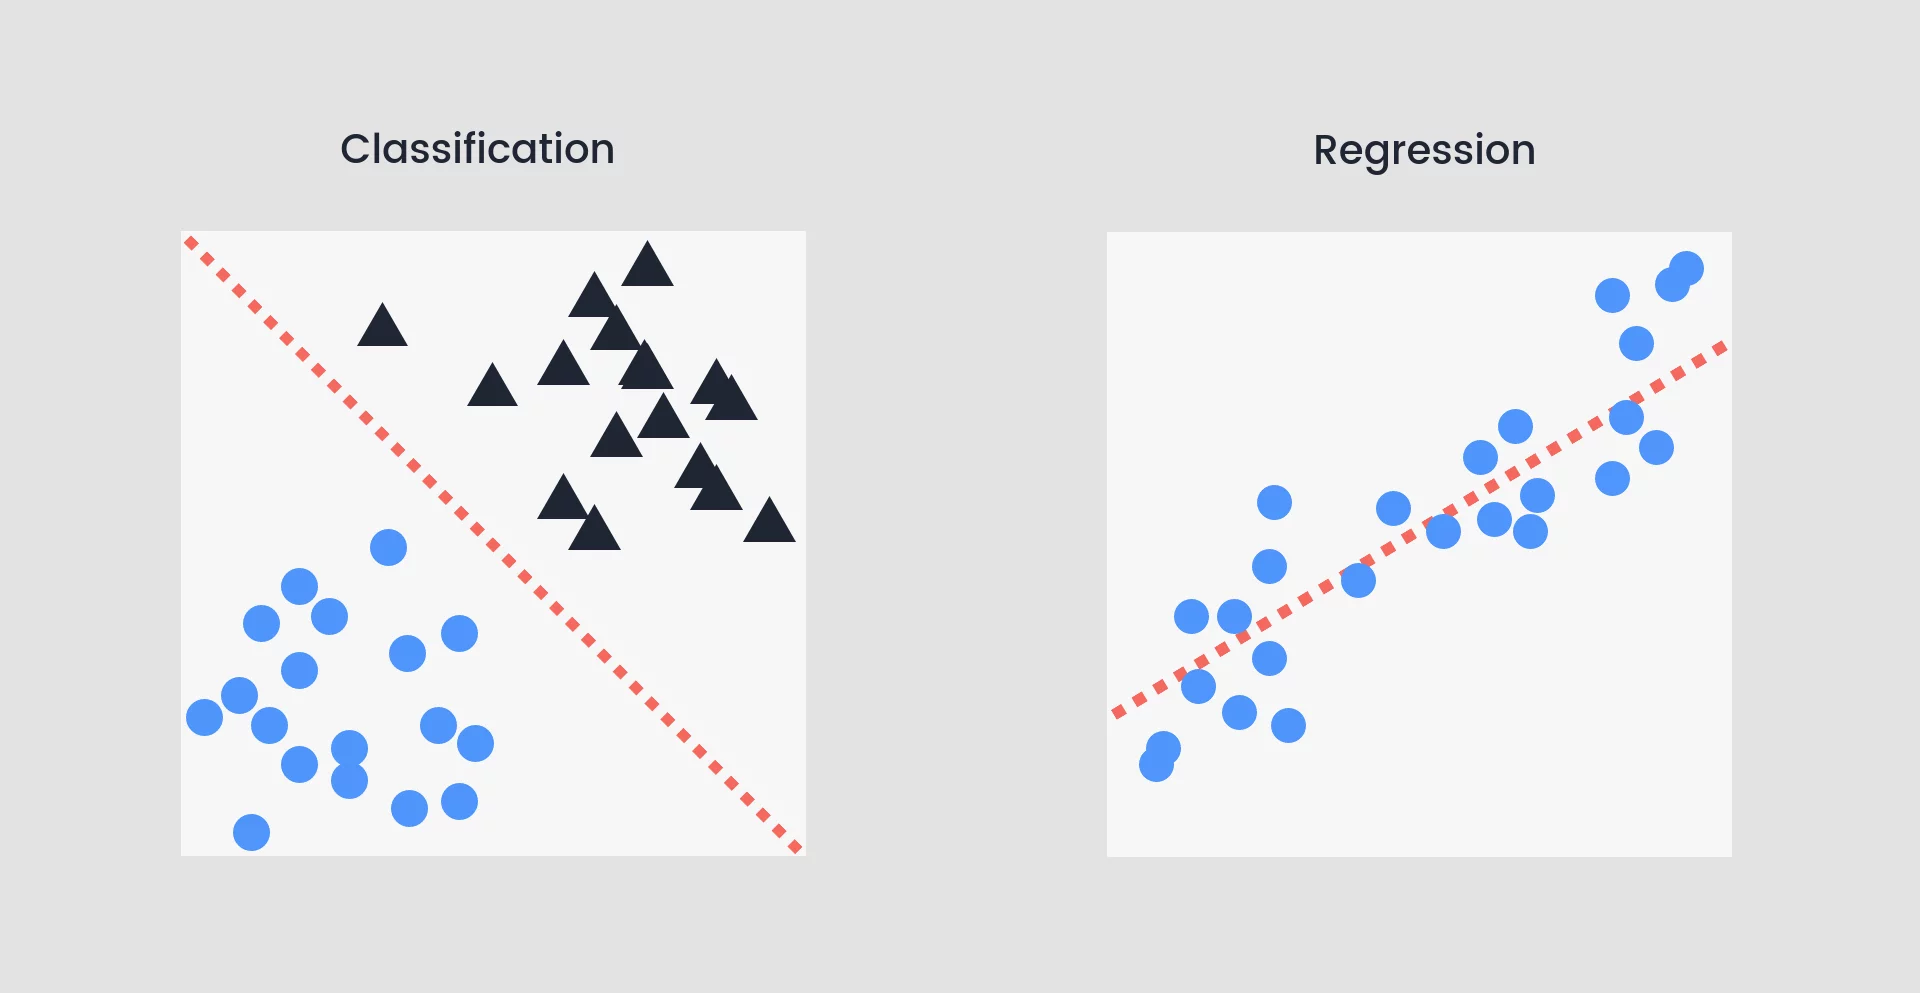

In [ ]:
#classification is when we want to split something into 2 sides

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

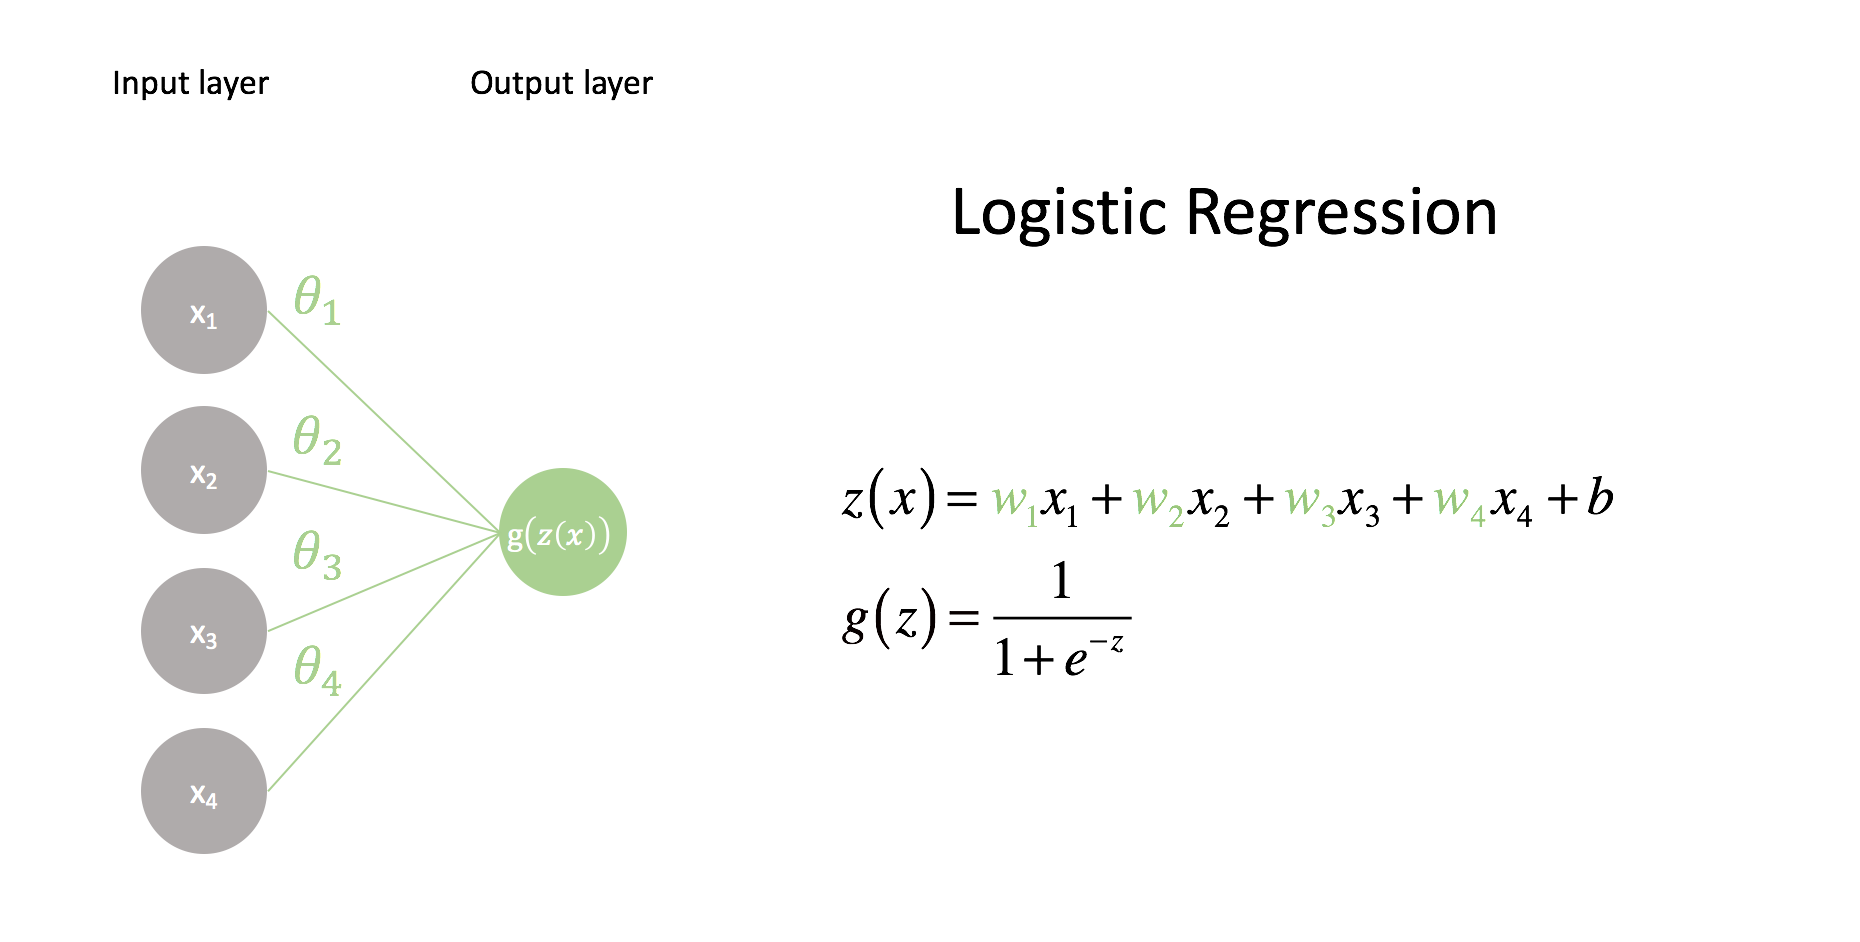

In [ ]:
#each of input and weight it by own weight

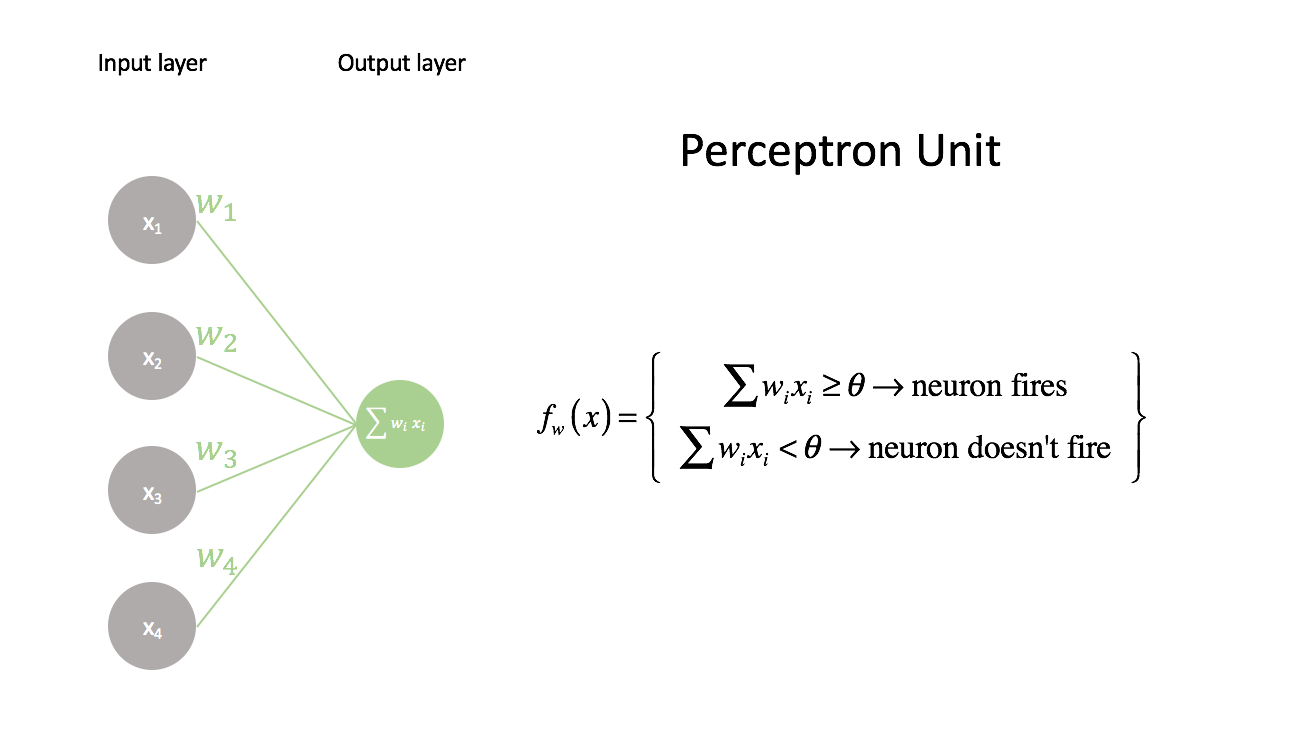

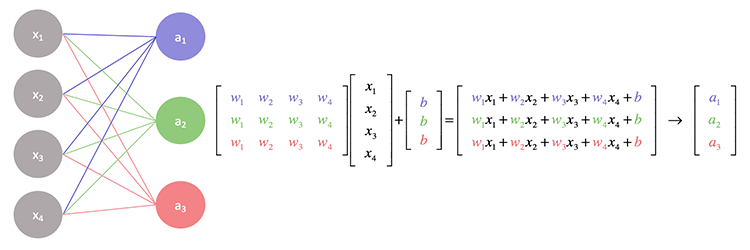

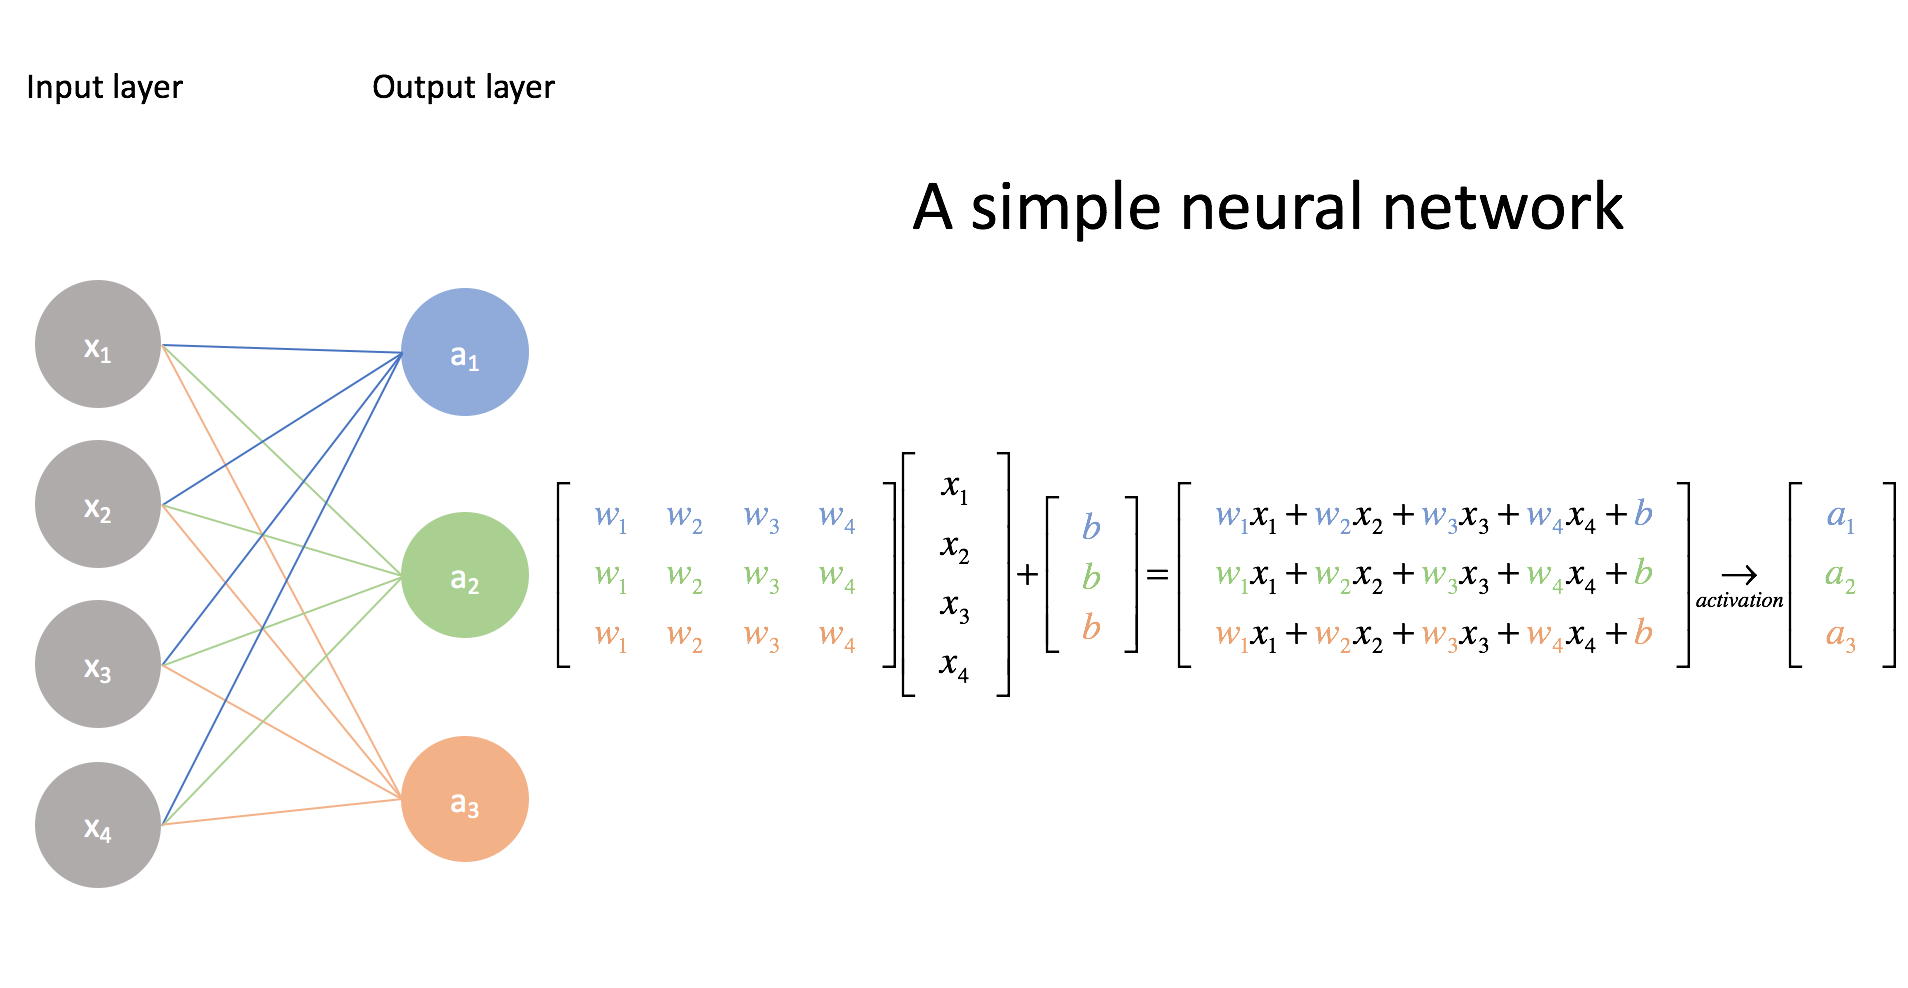

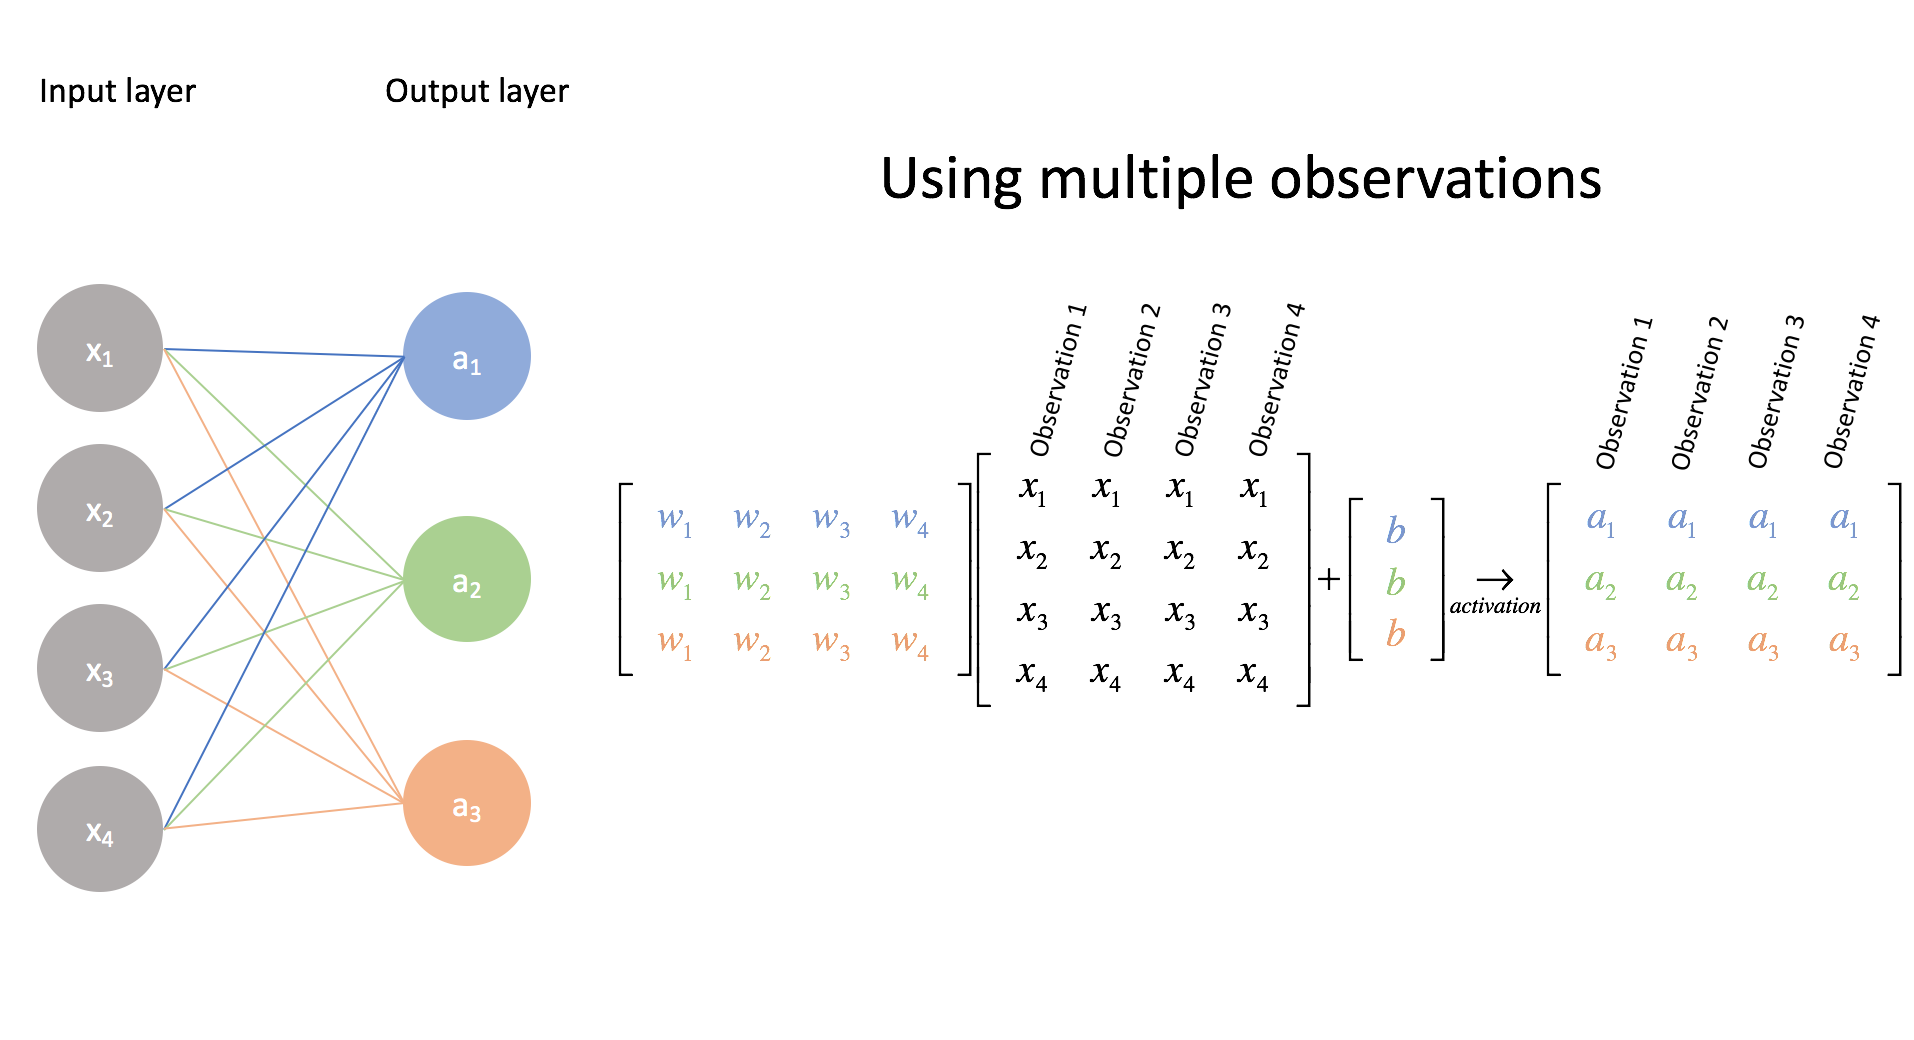

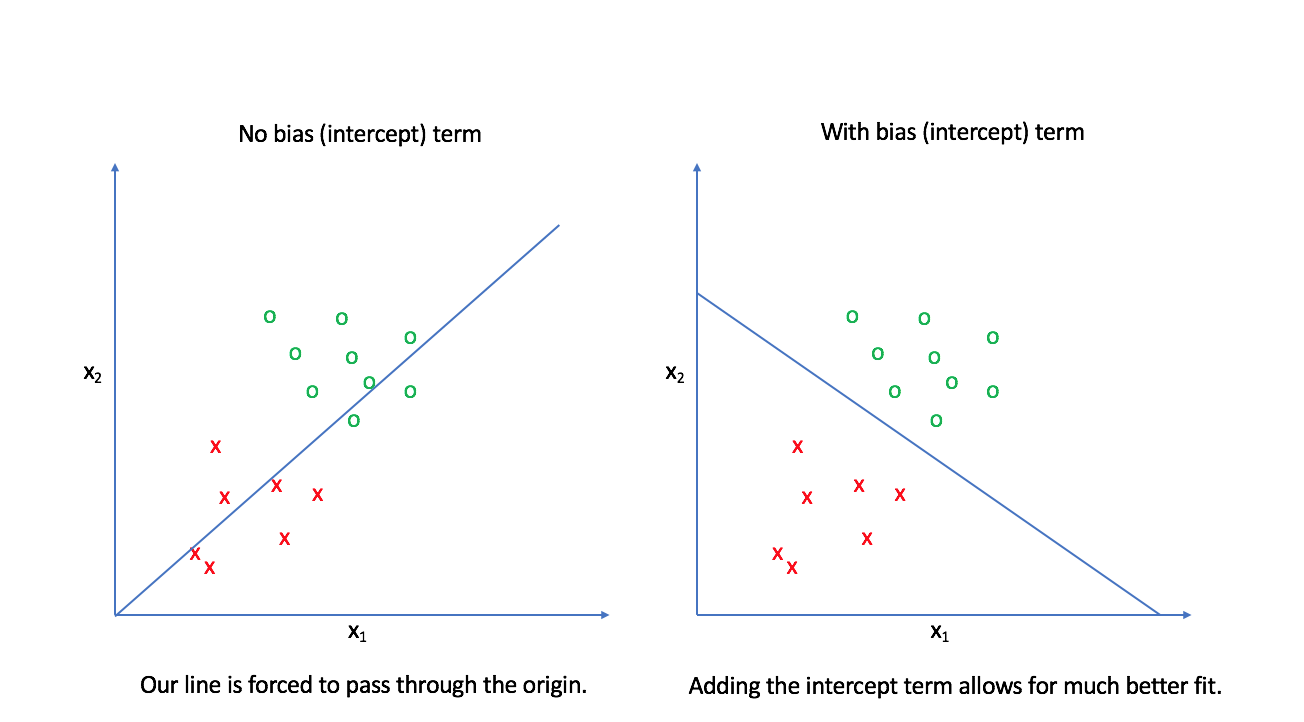

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-rjzrbx92
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-rjzrbx92
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [ ]:
x = np.arange(0,9)

In [ ]:
x.shape

(9,)

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(9, 1)

In [ ]:
y = 3*x-5

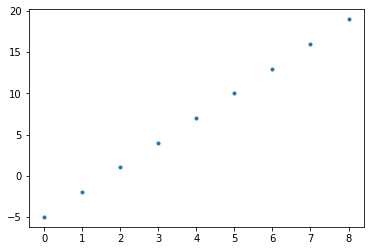

In [ ]:
plt.plot(x,y,'.')

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

  
    y_pred = m * x + b  # Define Model 
    
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    
    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 

    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 582.679931640625 1.4200613498687744 -1.4621096849441528
1 219.42127990722656 1.809948205947876 -1.4120361804962158
2 97.34077453613281 2.037155866622925 -1.3909357786178589
3 56.15257263183594 2.1701436042785645 -1.386574149131775
4 42.097618103027344 2.248558282852173 -1.3918662071228027
5 37.1454963684082 2.295360803604126 -1.4027087688446045
6 35.24882507324219 2.3238487243652344 -1.416725993156433
7 34.379356384277344 2.3417227268218994 -1.432542085647583
8 33.856807708740234 2.353442907333374 -1.4493603706359863
9 33.452964782714844 2.3615920543670654 -1.4667197465896606
10 33.09128952026367 2.367666244506836 -1.4843534231185913
11 32.74605178833008 2.3725318908691406 -1.50210702419281
12 32.408634185791016 2.376690626144409 -1.519891381263733
13 32.076107025146484 2.3804330825805664 -1.5376551151275635
14 31.747461318969727 2.383927583694458 -1.5553685426712036
15 31.422346115112305 2.3872716426849365 -1.573014736175537
16 31.100610733032227 2.390522003173828 -1.590584039688110

In [ ]:
loss.item()

0.0012574209831655025

In [ ]:
m.item()

2.9961254596710205

In [ ]:
b.item()

-4.978321075439453

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 185.79296875
2 1000 56.94954299926758
3 1000 20.384313583374023
4 1000 9.972846031188965
5 1000 6.974343776702881
6 1000 6.077345848083496
7 1000 5.776486873626709
8 1000 5.645112991333008
9 1000 5.562298774719238
10 1000 5.493766784667969
11 1000 5.429792404174805
12 1000 5.36761999130249
13 1000 5.306455612182617
14 1000 5.2460737228393555
15 1000 5.186403274536133
16 1000 5.127418518066406
17 1000 5.069106578826904
18 1000 5.011457920074463
19 1000 4.954464912414551
20 1000 4.898120403289795
21 1000 4.842416763305664
22 1000 4.787346363067627
23 1000 4.732903003692627
24 1000 4.679078102111816
25 1000 4.6258649826049805
26 1000 4.573256969451904
27 1000 4.521247863769531
28 1000 4.469829082489014
29 1000 4.418996810913086
30 1000 4.368741989135742
31 1000 4.319058895111084
32 1000 4.269939422607422
33 1000 4.22137975692749
34 1000 4.173372745513916
35 1000 4.125911235809326
36 1000 4.078988552093506
37 1000 4.0326008796691895
38 1000 3.9867405891418457
39 1000 3.9414002895355

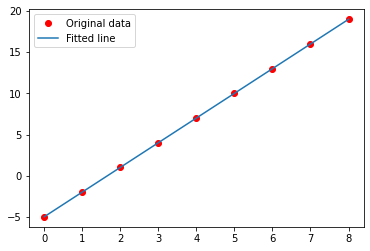

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight

Parameter containing:
tensor([[2.9973]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-4.9851], requires_grad=True)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
#important numbers

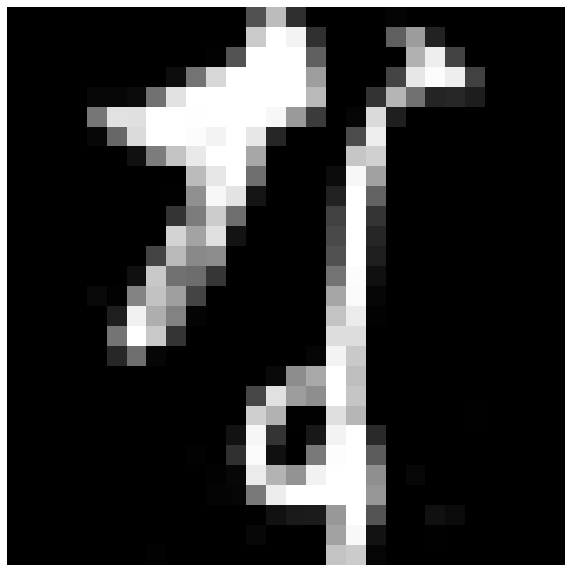

In [ ]:
plot(X[121,0,:,:])

In [ ]:
 #shows 1221st number, 0 is always zero bc b&w image, Shows the whole image (cropping)

In [ ]:
 Y[1221]

2

In [ ]:
#stack of flashcards and an answer key, tells us what the picture number looks like

In [ ]:
X[0:25,0,:,:].shape #gives us first 25, 0th color channel, wildcard, wildcard

(25, 28, 28)

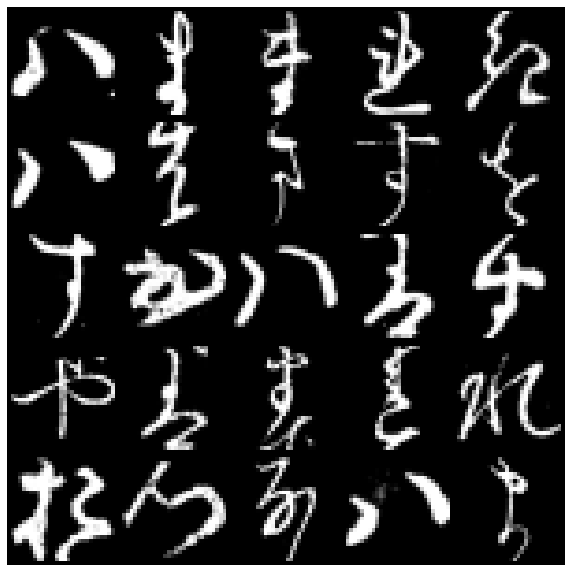

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

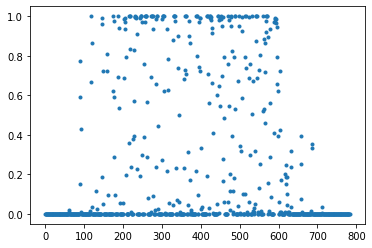

In [ ]:
plt.plot(X[100],'.')

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W (3).data'

In [ ]:
#allows us to upload all of data at once

In [ ]:
W = torch.load("W.data")

In [ ]:
#sort out images

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

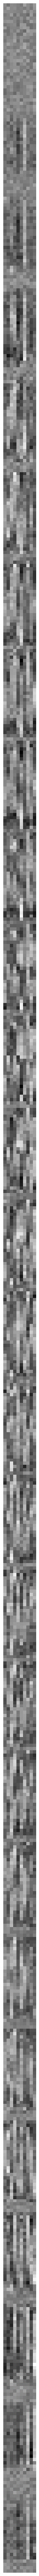

In [ ]:
plot(W[0:784,:10])

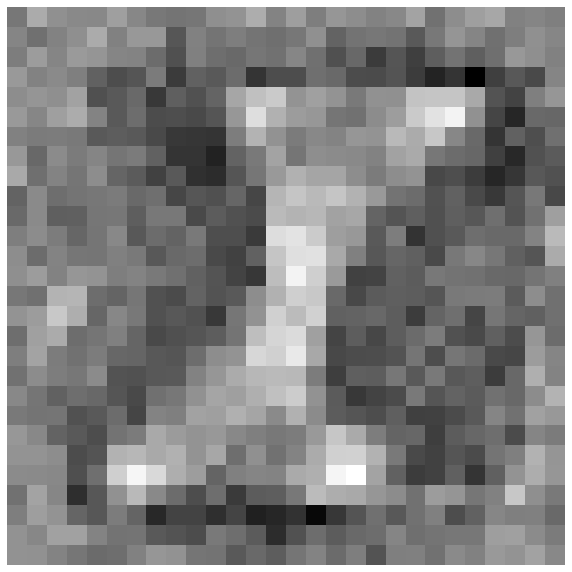

In [ ]:
plot(W[:,1].reshape(28,28)) #taking one of the collums and turning it back into a sqaure

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
#gives some of the data

In [ ]:
x.shape

torch.Size([1000, 784])

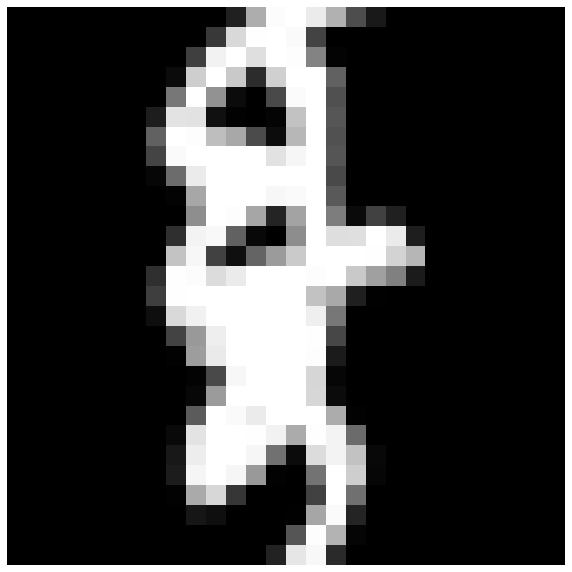

In [ ]:
plot(x[0].reshape(28,28))

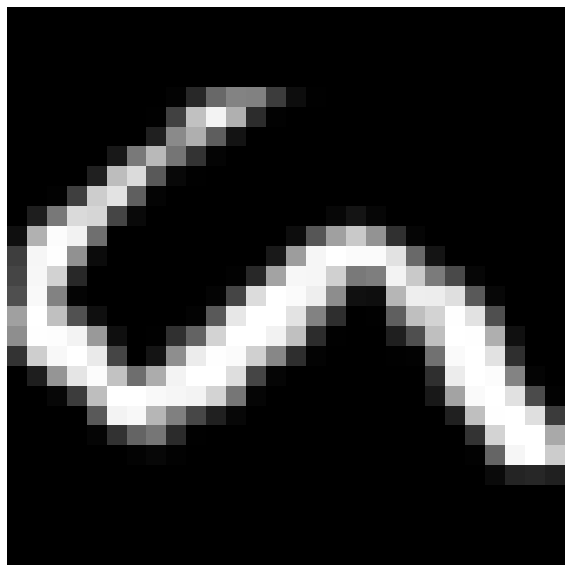

In [ ]:
plot(x[1].reshape(28,28))

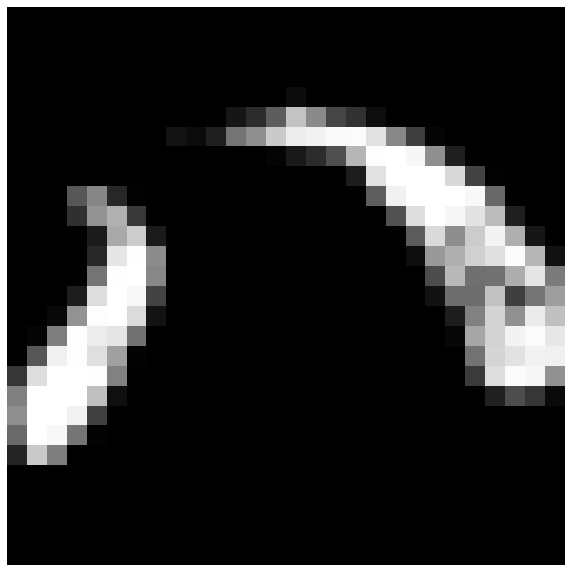

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y #answer key

tensor([6., 5., 5., 8., 9., 7., 0., 7., 5., 3., 7., 2., 9., 6., 5., 0., 1., 7.,
        1., 0., 8., 7., 9., 9., 0., 4., 0., 4., 9., 1., 8., 0., 9., 8., 4., 2.,
        0., 3., 1., 9., 8., 3., 8., 5., 3., 8., 0., 8., 9., 8., 8., 1., 3., 2.,
        9., 9., 1., 1., 9., 1., 9., 4., 9., 2., 7., 7., 8., 9., 1., 1., 8., 7.,
        4., 7., 3., 5., 1., 8., 3., 3., 0., 2., 9., 3., 5., 3., 4., 9., 6., 7.,
        8., 2., 9., 3., 8., 4., 8., 5., 3., 4., 0., 2., 0., 2., 2., 9., 0., 3.,
        6., 9., 7., 3., 1., 1., 5., 4., 3., 6., 9., 1., 0., 4., 5., 3., 3., 5.,
        8., 1., 8., 7., 6., 3., 7., 4., 8., 9., 1., 2., 0., 4., 9., 5., 7., 4.,
        8., 6., 3., 5., 9., 5., 9., 1., 3., 5., 8., 3., 7., 0., 2., 0., 4., 1.,
        5., 5., 3., 6., 2., 9., 1., 6., 3., 7., 1., 5., 8., 2., 3., 8., 2., 3.,
        6., 6., 1., 1., 8., 3., 9., 6., 1., 3., 4., 4., 9., 6., 8., 9., 4., 6.,
        9., 3., 1., 9., 5., 4., 7., 1., 3., 9., 2., 6., 0., 1., 7., 0., 9., 5.,
        5., 2., 9., 9., 1., 3., 6., 3., 

In [ ]:
x.shape, W.shape 

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
#matrix multiplication leaves us 1000 by 10

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

20.4 µs ± 370 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
#takes 20 milliseconds

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[-11.6121,  -7.5864,   0.2190,  ...,  -5.0807,  -0.8793,  -1.4649],
        [-10.8427, -10.5899,  10.8554,  ..., -11.2734, -11.2231, -16.2832],
        [  0.5025, -14.0545,   0.3628,  ...,  -7.2695,  -9.6262, -15.2787],
        ...,
        [-28.2047, -13.9166, -10.2508,  ...,  -5.8935, -15.4562, -12.3775],
        [-10.4202,  -8.8168, -13.0000,  ...,   8.8121,  -8.2711,  -0.0374],
        [-16.0003, -22.4584,  -7.4617,  ...,  -3.3535, -20.4443,  -9.4208]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W #mx

In [ ]:
y2.shape

torch.Size([1000, 10])

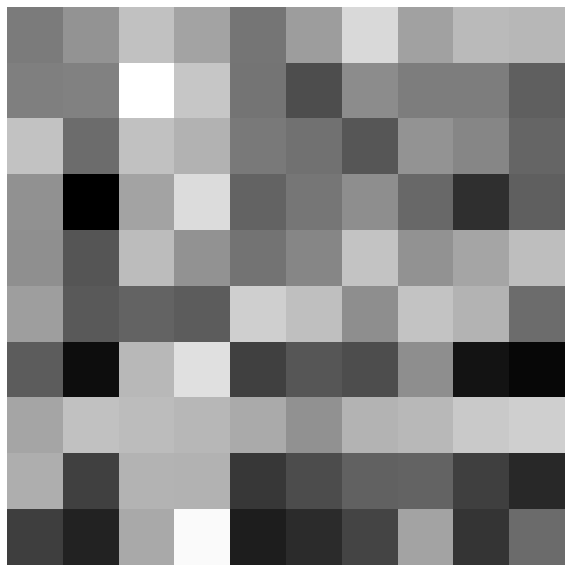

In [ ]:
plot(y2[0:10,:])

In [ ]:
#find the brighest spot

In [ ]:
y

tensor([6., 5., 5., 8., 9., 7., 0., 7., 5., 3., 7., 2., 9., 6., 5., 0., 1., 7.,
        1., 0., 8., 7., 9., 9., 0., 4., 0., 4., 9., 1., 8., 0., 9., 8., 4., 2.,
        0., 3., 1., 9., 8., 3., 8., 5., 3., 8., 0., 8., 9., 8., 8., 1., 3., 2.,
        9., 9., 1., 1., 9., 1., 9., 4., 9., 2., 7., 7., 8., 9., 1., 1., 8., 7.,
        4., 7., 3., 5., 1., 8., 3., 3., 0., 2., 9., 3., 5., 3., 4., 9., 6., 7.,
        8., 2., 9., 3., 8., 4., 8., 5., 3., 4., 0., 2., 0., 2., 2., 9., 0., 3.,
        6., 9., 7., 3., 1., 1., 5., 4., 3., 6., 9., 1., 0., 4., 5., 3., 3., 5.,
        8., 1., 8., 7., 6., 3., 7., 4., 8., 9., 1., 2., 0., 4., 9., 5., 7., 4.,
        8., 6., 3., 5., 9., 5., 9., 1., 3., 5., 8., 3., 7., 0., 2., 0., 4., 1.,
        5., 5., 3., 6., 2., 9., 1., 6., 3., 7., 1., 5., 8., 2., 3., 8., 2., 3.,
        6., 6., 1., 1., 8., 3., 9., 6., 1., 3., 4., 4., 9., 6., 8., 9., 4., 6.,
        9., 3., 1., 9., 5., 4., 7., 1., 3., 9., 2., 6., 0., 1., 7., 0., 9., 5.,
        5., 2., 9., 9., 1., 3., 6., 3., 

In [ ]:
one_hot(y) #takes y values that are the birghest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


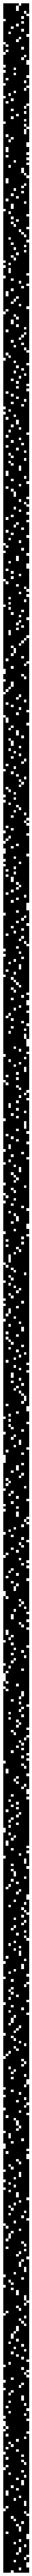

In [ ]:
plot(one_hot(y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


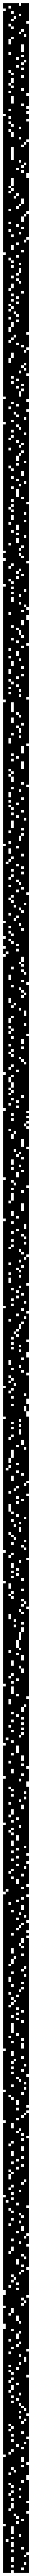

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

tensor([6., 5., 5., 8., 9., 7., 0., 7., 5., 3., 7., 2., 9., 6., 5., 0., 1., 7.,
        1., 0., 8., 7., 9., 9., 0., 4., 0., 4., 9., 1., 8., 0., 9., 8., 4., 2.,
        0., 3., 1., 9., 8., 3., 8., 5., 3., 8., 0., 8., 9., 8., 8., 1., 3., 2.,
        9., 9., 1., 1., 9., 1., 9., 4., 9., 2., 7., 7., 8., 9., 1., 1., 8., 7.,
        4., 7., 3., 5., 1., 8., 3., 3., 0., 2., 9., 3., 5., 3., 4., 9., 6., 7.,
        8., 2., 9., 3., 8., 4., 8., 5., 3., 4., 0., 2., 0., 2., 2., 9., 0., 3.,
        6., 9., 7., 3., 1., 1., 5., 4., 3., 6., 9., 1., 0., 4., 5., 3., 3., 5.,
        8., 1., 8., 7., 6., 3., 7., 4., 8., 9., 1., 2., 0., 4., 9., 5., 7., 4.,
        8., 6., 3., 5., 9., 5., 9., 1., 3., 5., 8., 3., 7., 0., 2., 0., 4., 1.,
        5., 5., 3., 6., 2., 9., 1., 6., 3., 7., 1., 5., 8., 2., 3., 8., 2., 3.,
        6., 6., 1., 1., 8., 3., 9., 6., 1., 3., 4., 4., 9., 6., 8., 9., 4., 6.,
        9., 3., 1., 9., 5., 4., 7., 1., 3., 9., 2., 6., 0., 1., 7., 0., 9., 5.,
        5., 2., 9., 9., 1., 3., 6., 3., 

In [ ]:
torch.argmax(y2,1)

tensor([6, 2, 0, 3, 6, 4, 3, 9, 2, 3, 7, 6, 8, 3, 2, 2, 7, 7, 7, 2, 7, 5, 8, 7,
        5, 7, 2, 3, 7, 3, 3, 2, 3, 7, 2, 9, 3, 3, 3, 7, 9, 2, 9, 0, 2, 9, 2, 3,
        6, 2, 3, 3, 6, 9, 8, 7, 3, 3, 3, 3, 3, 6, 8, 7, 5, 7, 9, 9, 3, 3, 3, 2,
        3, 2, 5, 4, 7, 7, 6, 5, 2, 9, 8, 7, 7, 2, 5, 7, 2, 6, 3, 9, 8, 5, 3, 3,
        7, 0, 5, 2, 3, 6, 3, 6, 6, 5, 3, 5, 6, 3, 3, 2, 7, 3, 5, 3, 5, 2, 3, 2,
        4, 5, 2, 5, 3, 3, 2, 2, 9, 4, 3, 2, 5, 7, 9, 8, 3, 3, 2, 2, 8, 7, 8, 6,
        9, 3, 5, 3, 7, 5, 7, 6, 6, 0, 9, 3, 5, 2, 9, 4, 5, 8, 3, 0, 5, 6, 3, 8,
        3, 2, 5, 7, 6, 2, 7, 6, 5, 5, 8, 5, 2, 3, 7, 7, 3, 5, 8, 6, 3, 5, 5, 5,
        7, 3, 9, 3, 2, 3, 8, 3, 3, 8, 2, 5, 5, 3, 5, 8, 5, 5, 2, 7, 6, 0, 6, 7,
        0, 9, 3, 2, 6, 5, 7, 5, 2, 3, 0, 3, 8, 3, 6, 3, 3, 6, 8, 9, 7, 2, 9, 9,
        7, 7, 3, 5, 6, 6, 7, 3, 5, 9, 7, 2, 5, 5, 2, 6, 3, 3, 7, 2, 2, 7, 5, 2,
        3, 5, 2, 6, 2, 6, 9, 0, 3, 3, 3, 3, 5, 6, 3, 3, 7, 5, 6, 6, 3, 6, 2, 2,
        9, 7, 7, 7, 3, 5, 3, 7, 7, 7, 2,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0850, device='cuda:0')

In [ ]:
#brighest spot --> arg

In [ ]:
# divide by how many images (1000)

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0789, device='cuda:0')

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

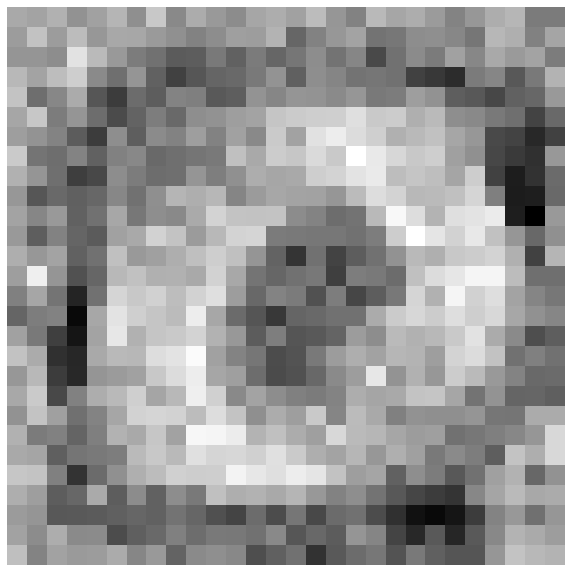

In [ ]:
plot(W[:,0].reshape(28,28)) #turned back into an image

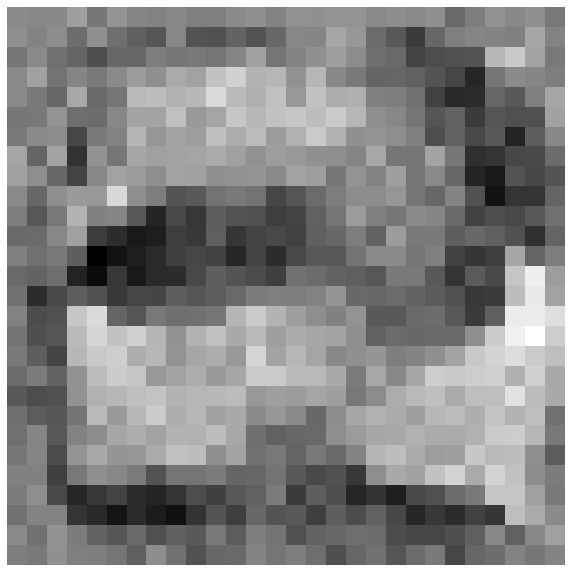

In [ ]:
plot(W[:,2].reshape(28,28))

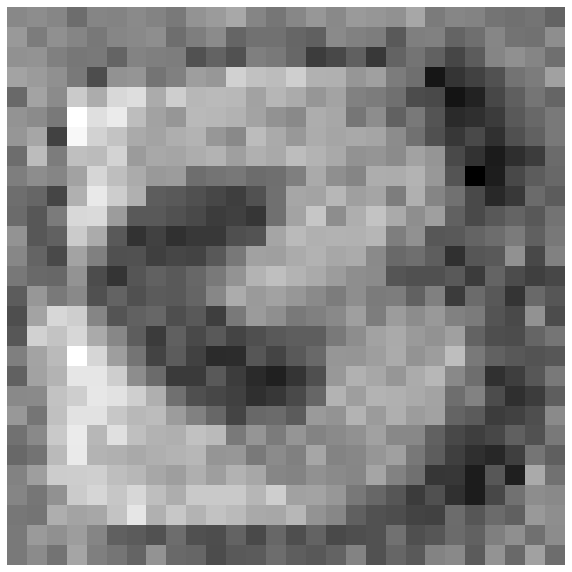

In [ ]:
plot(W[:,3].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

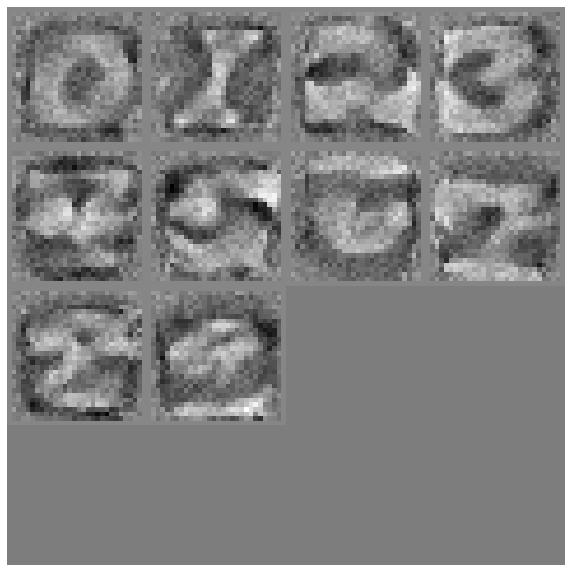

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
#total probability

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
#accuracy

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
#data to catagories

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


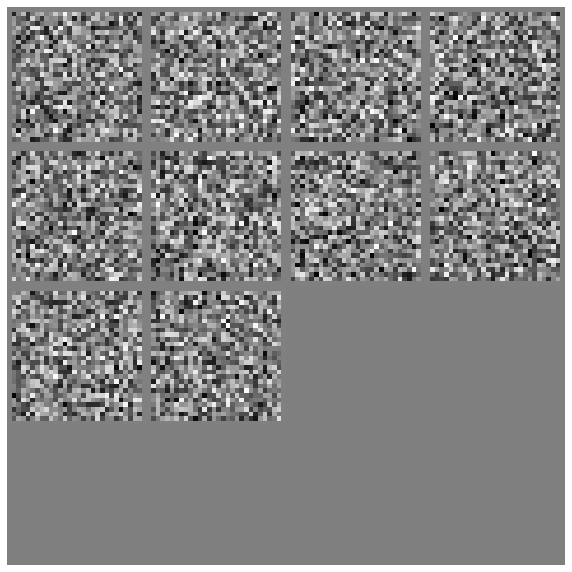

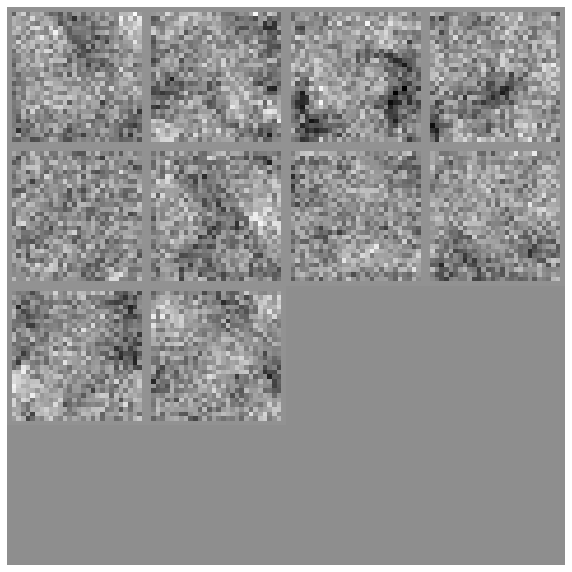

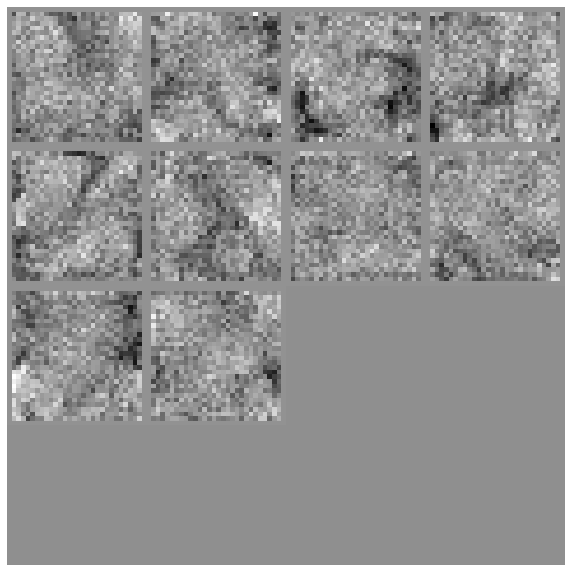

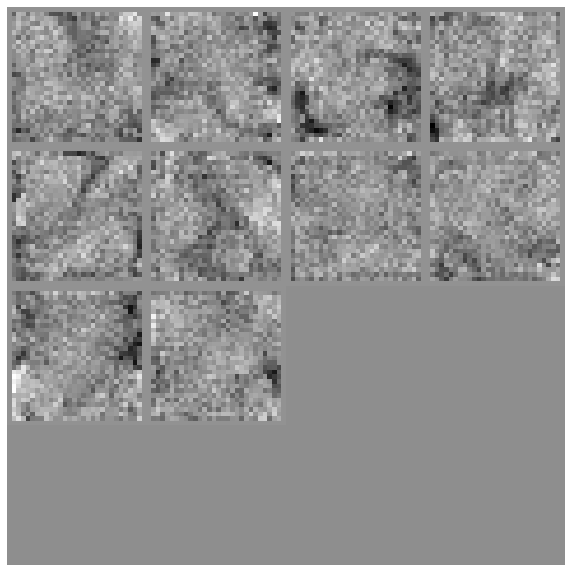

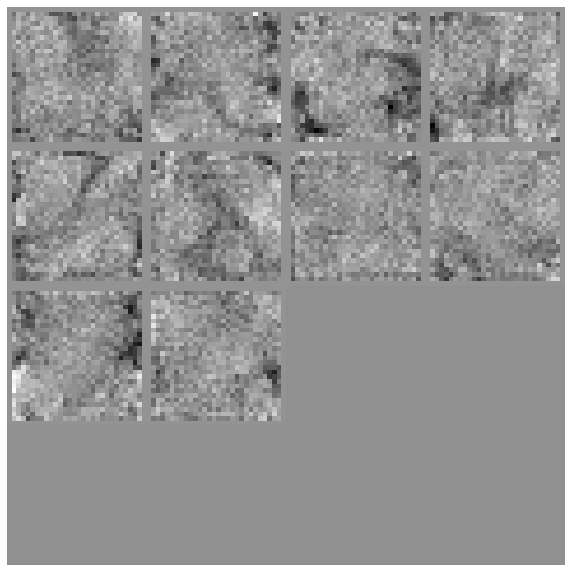

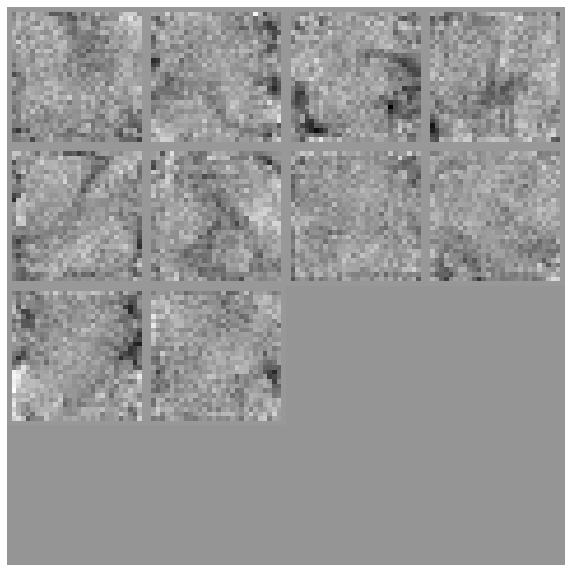

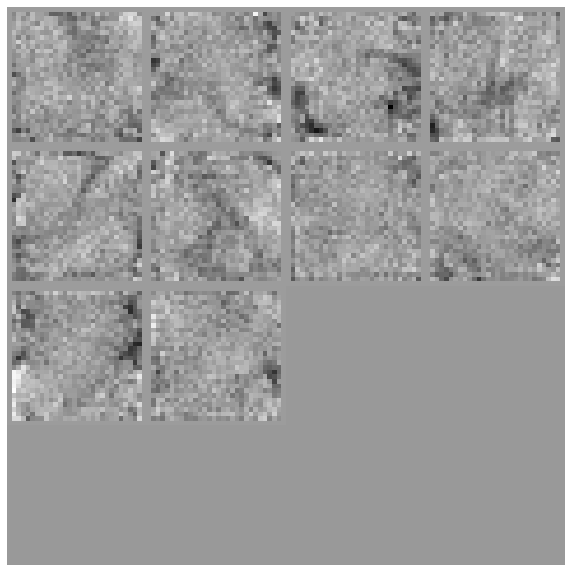

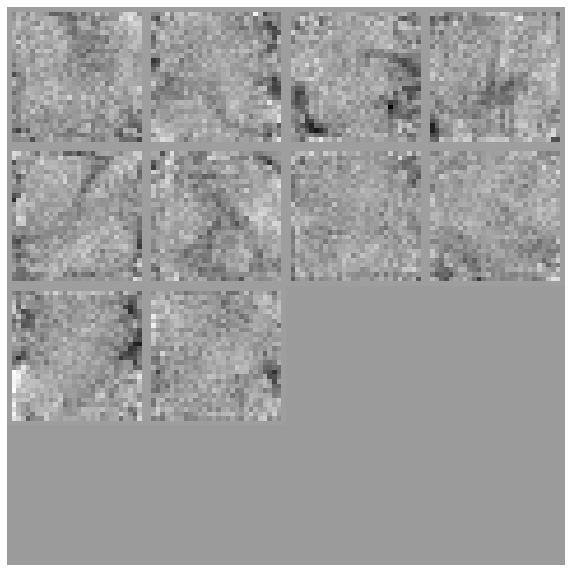

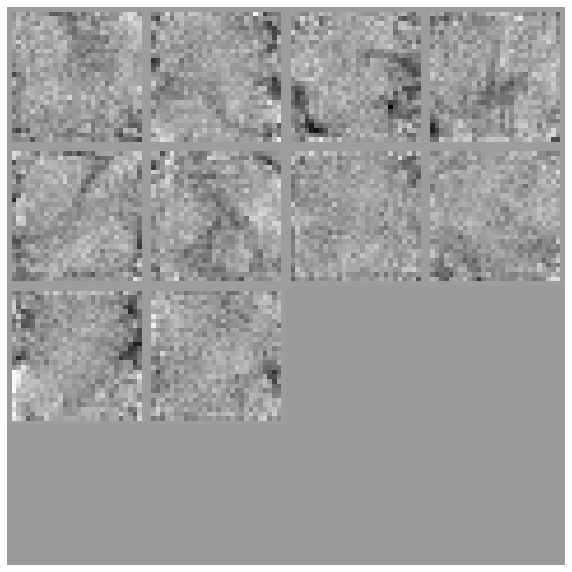

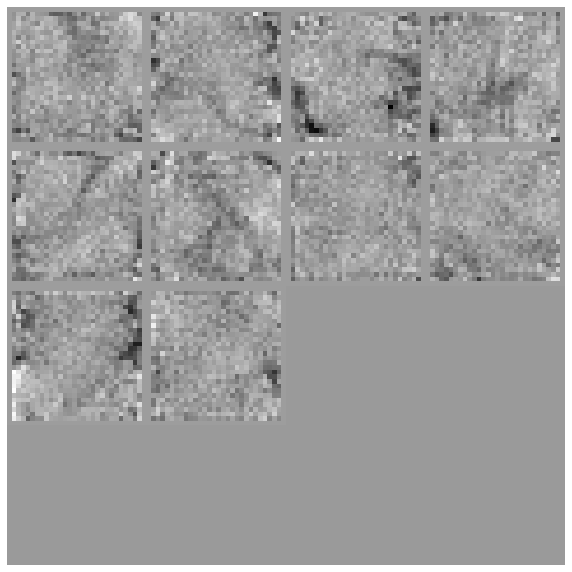

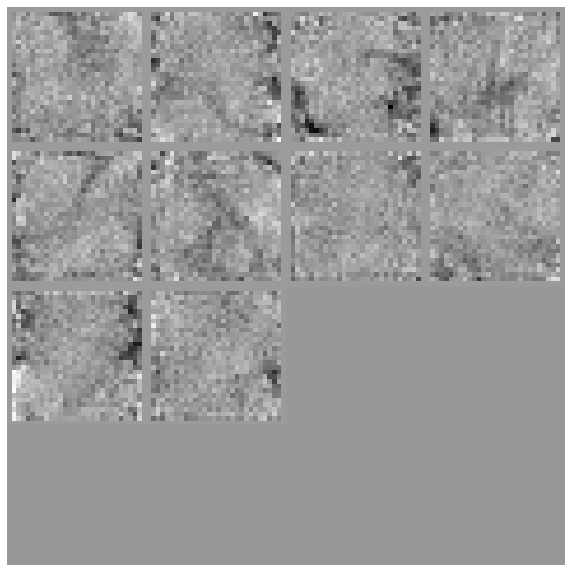

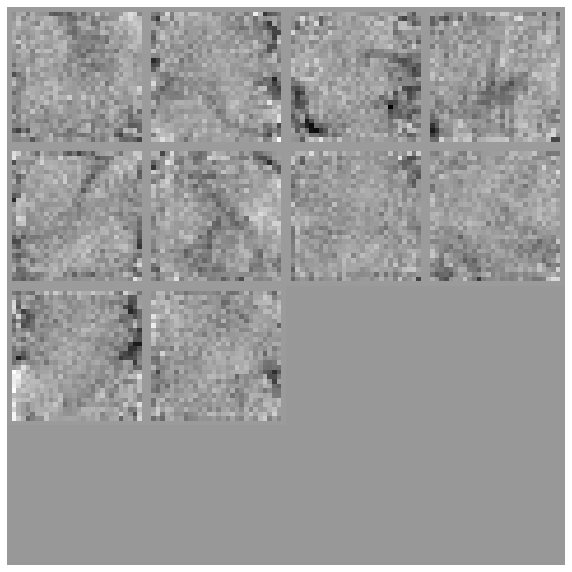

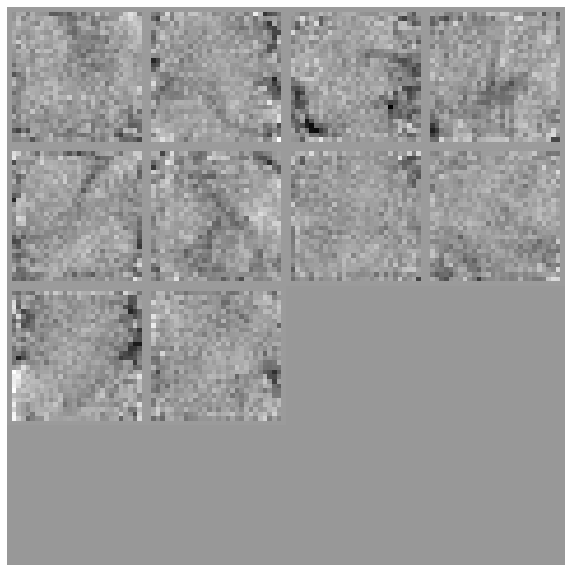

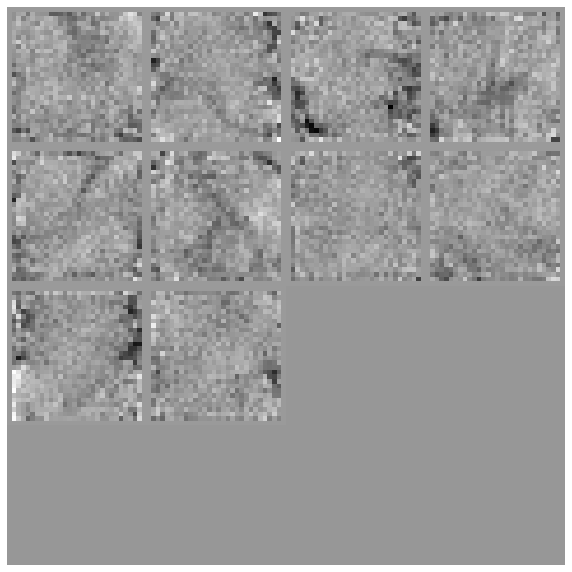

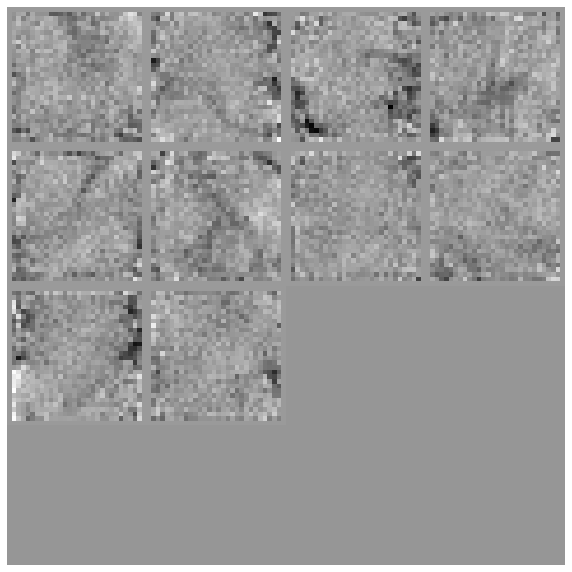

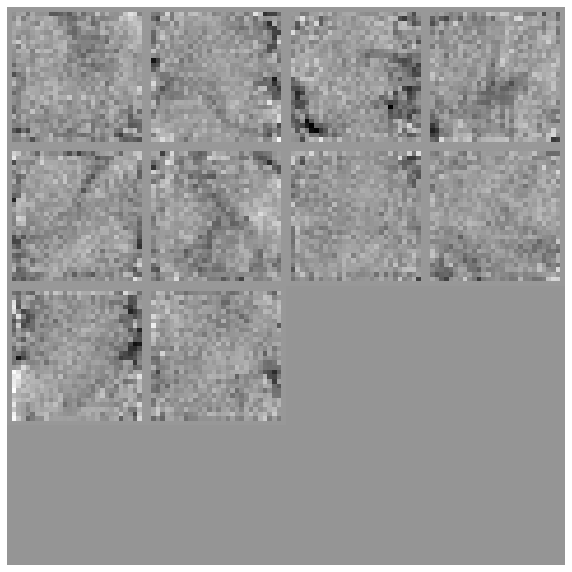

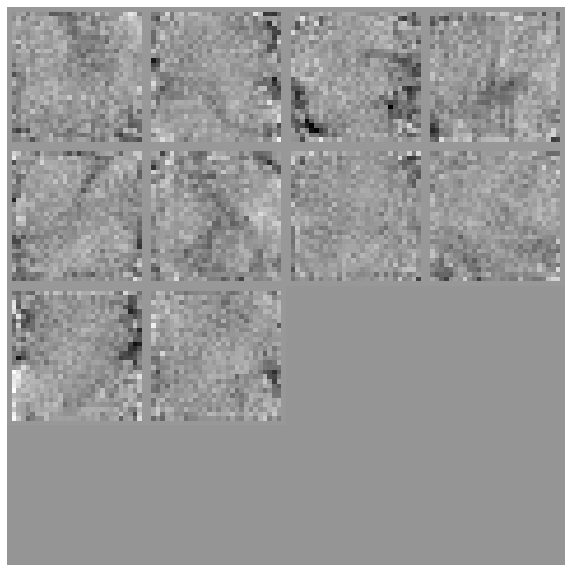

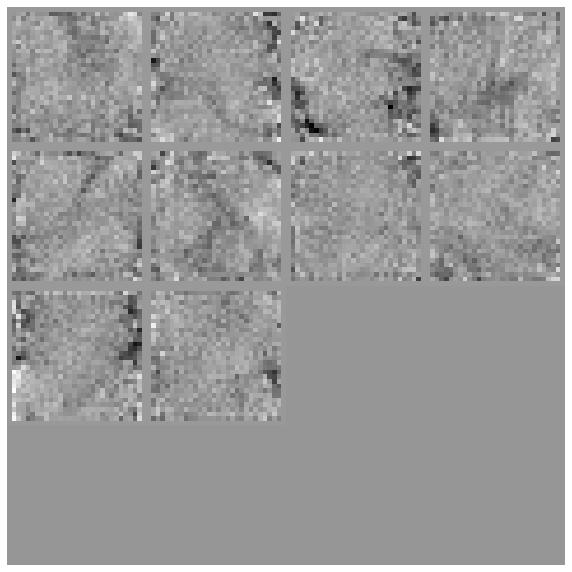

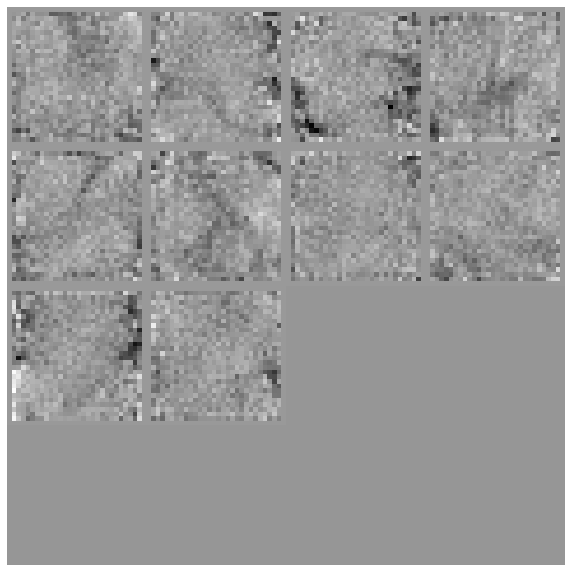

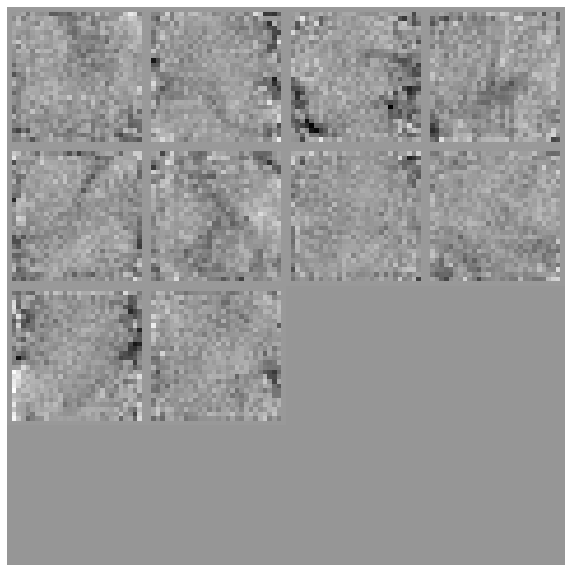

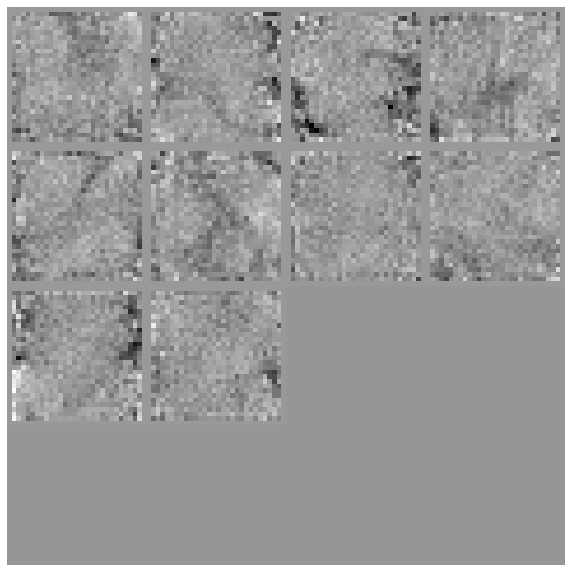

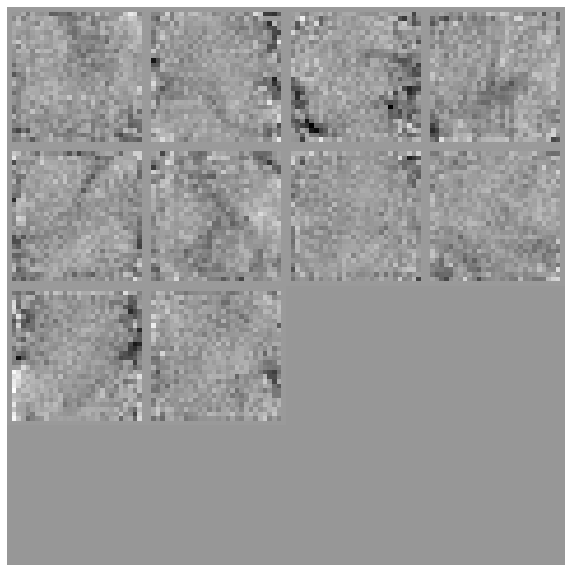

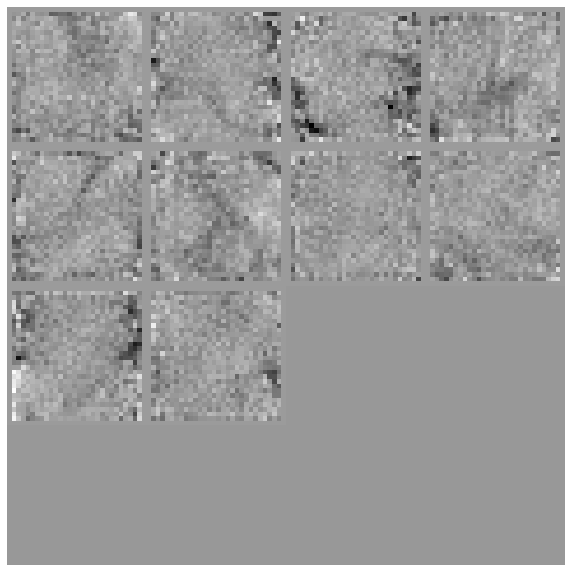

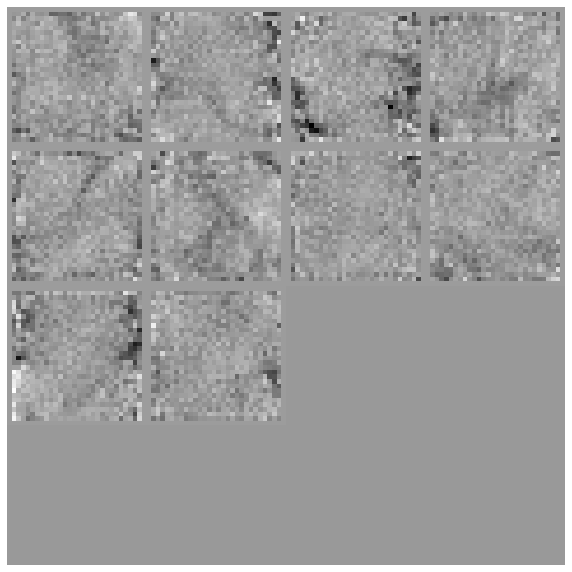

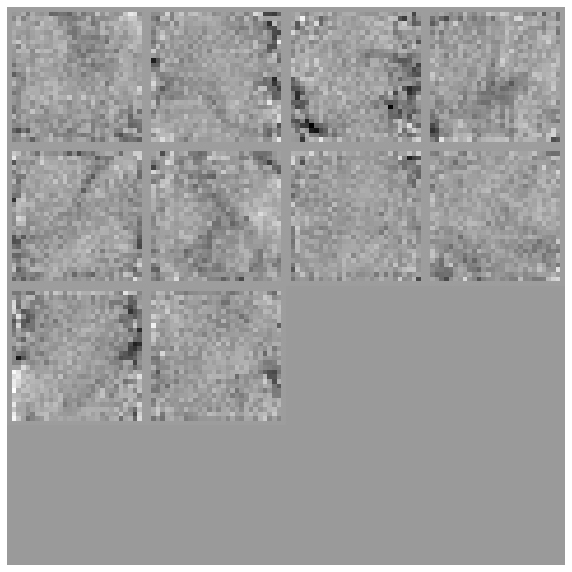

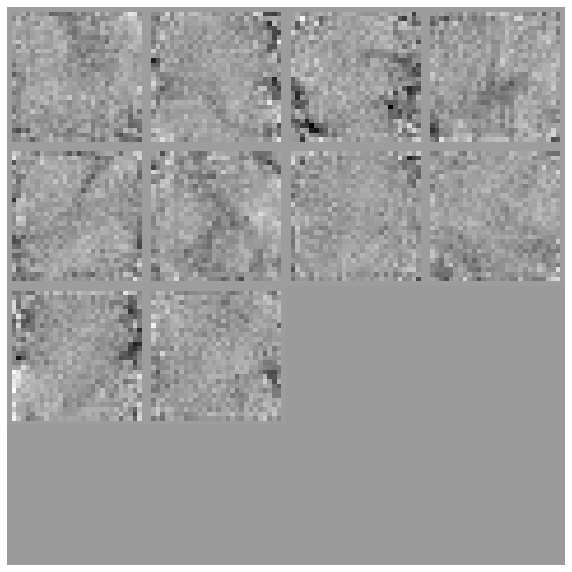

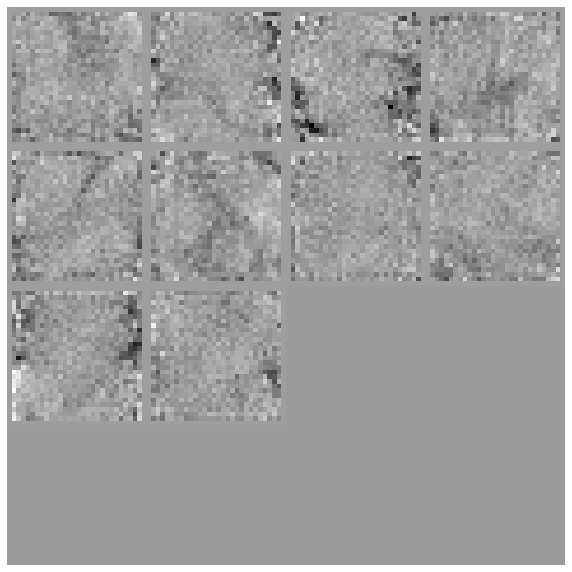

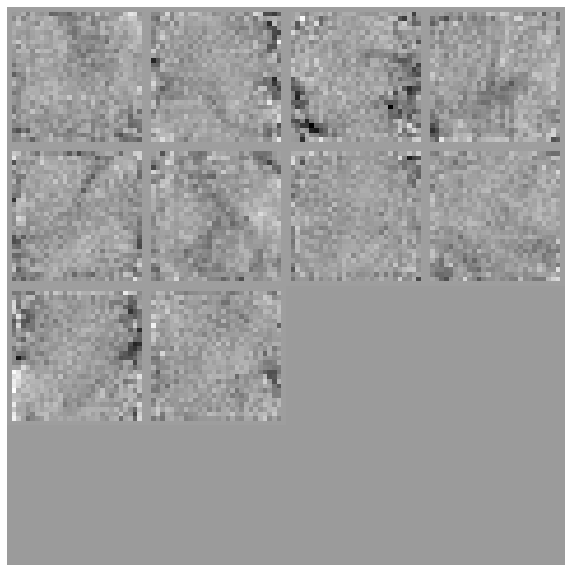

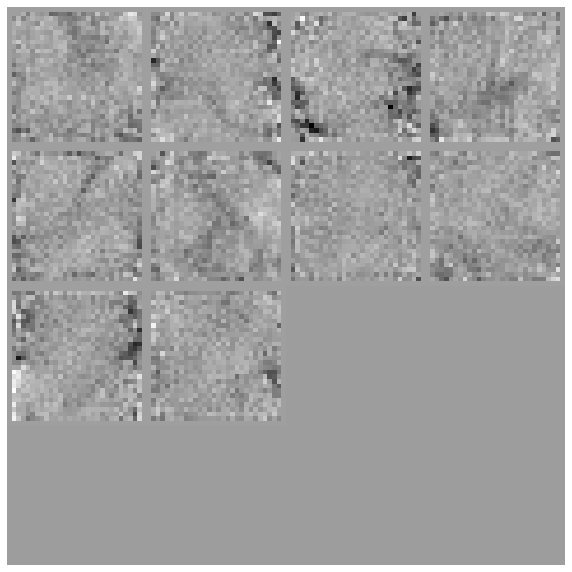

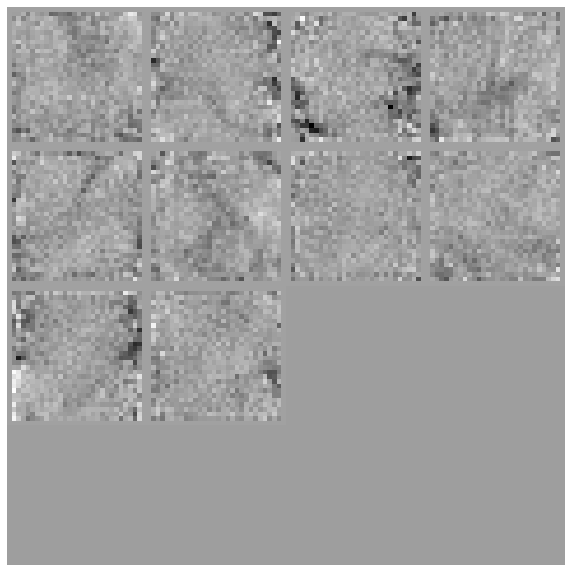

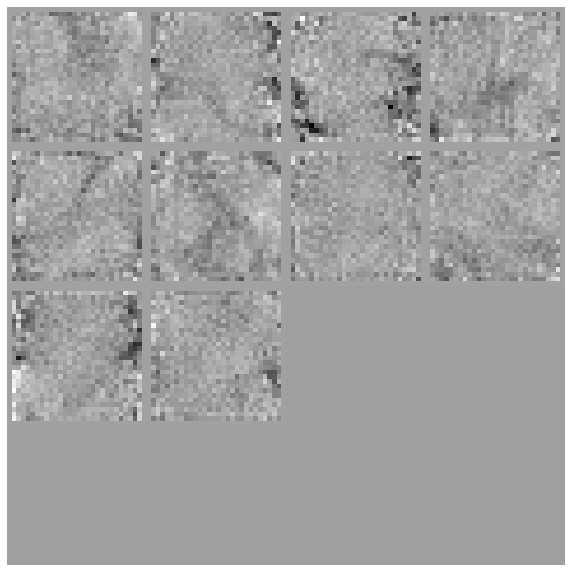

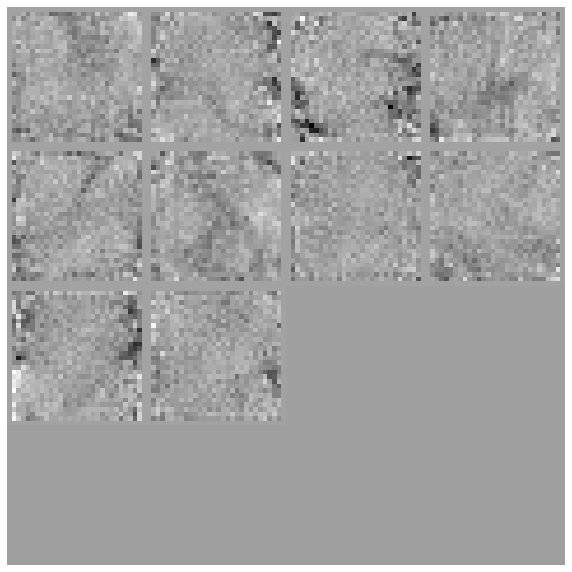

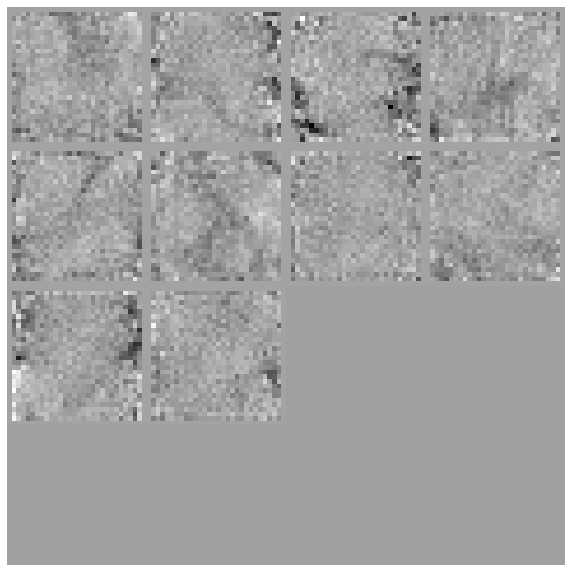

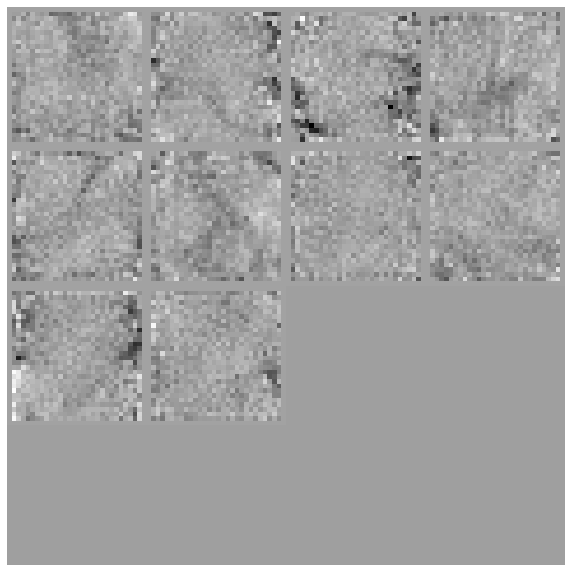

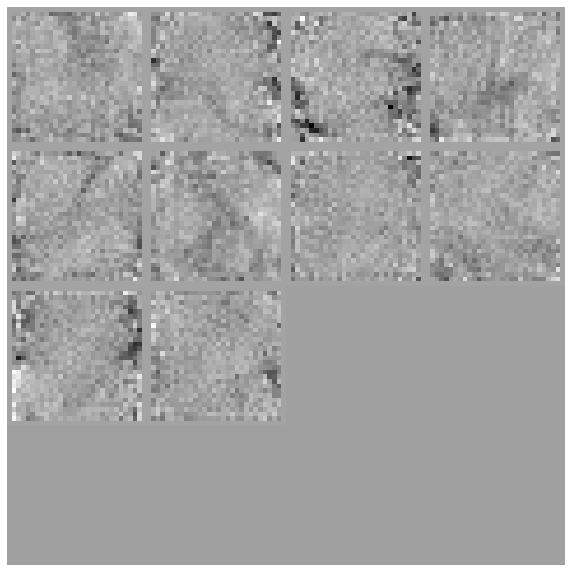

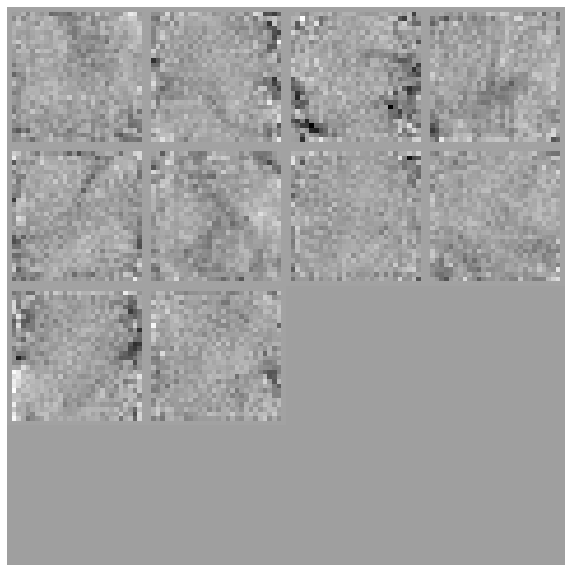

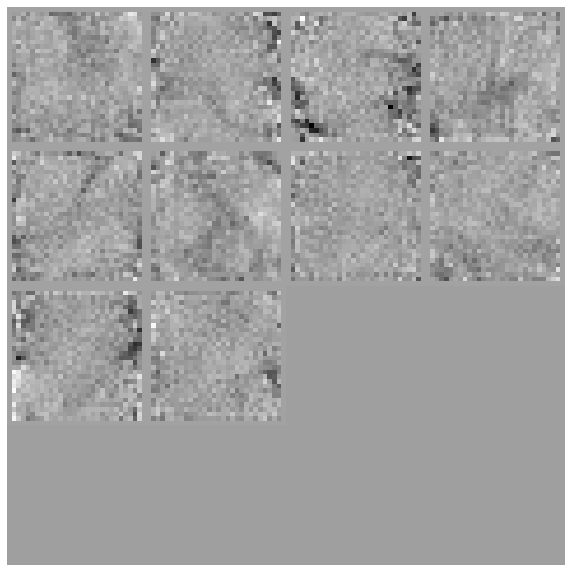

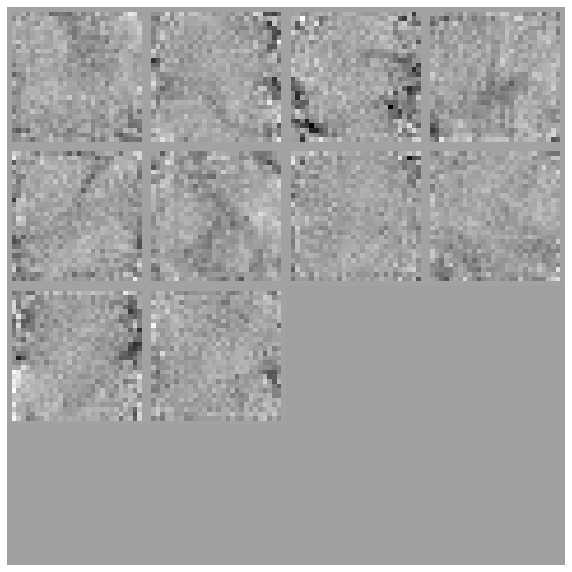

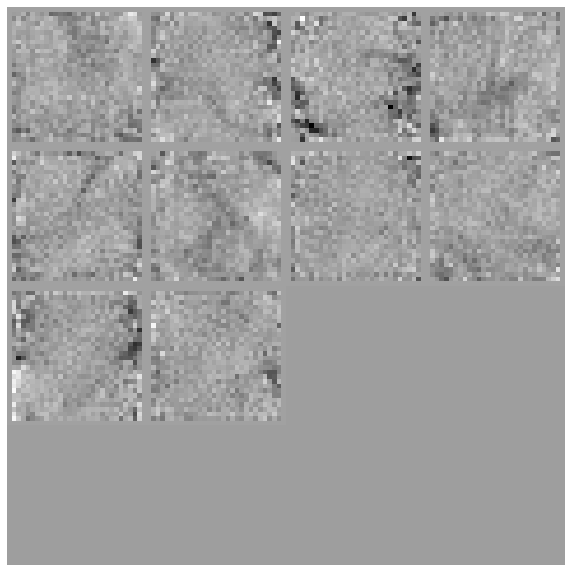

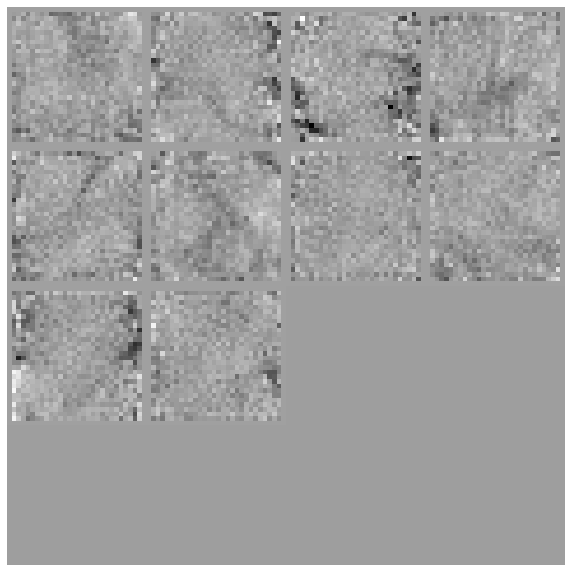

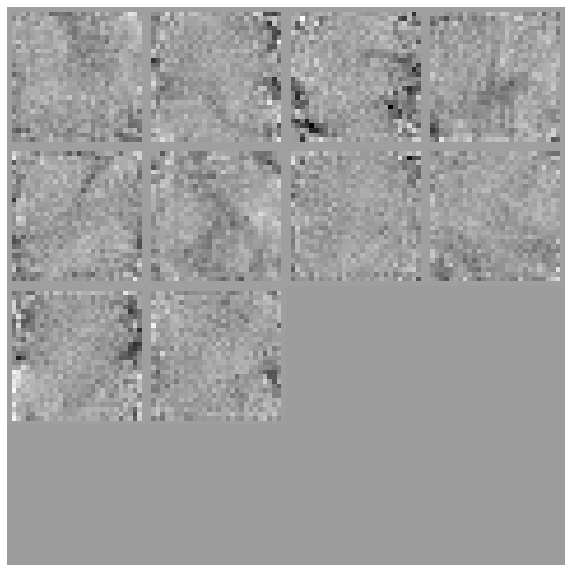

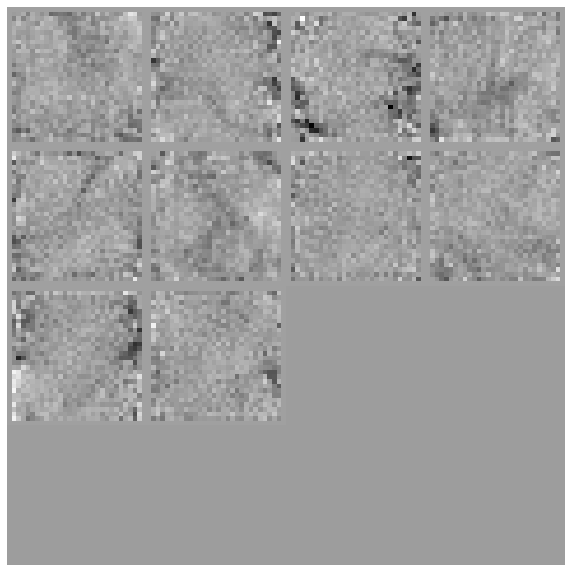

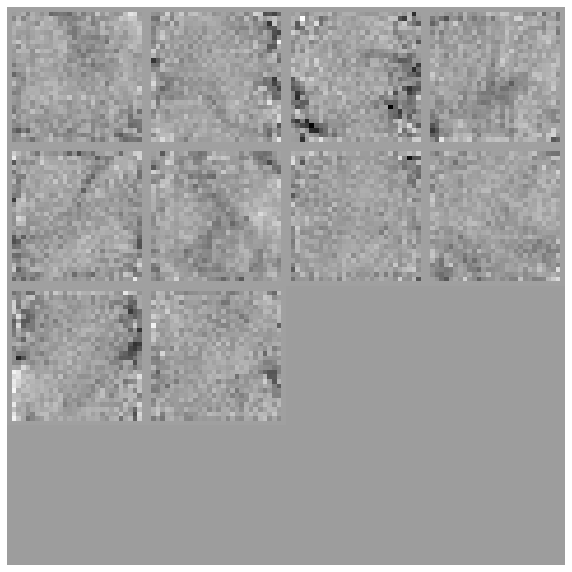

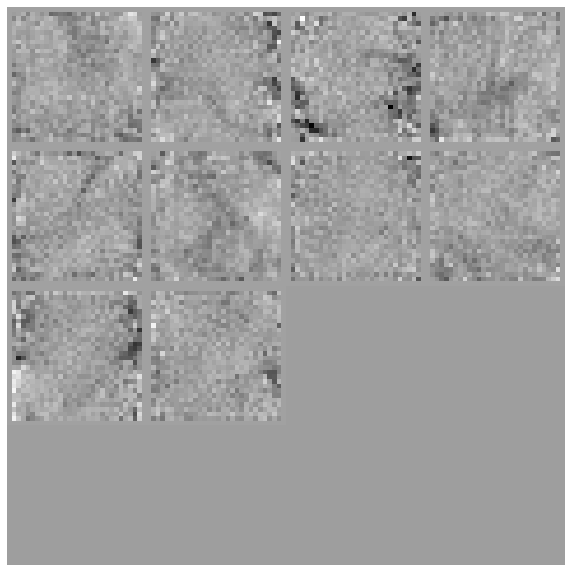

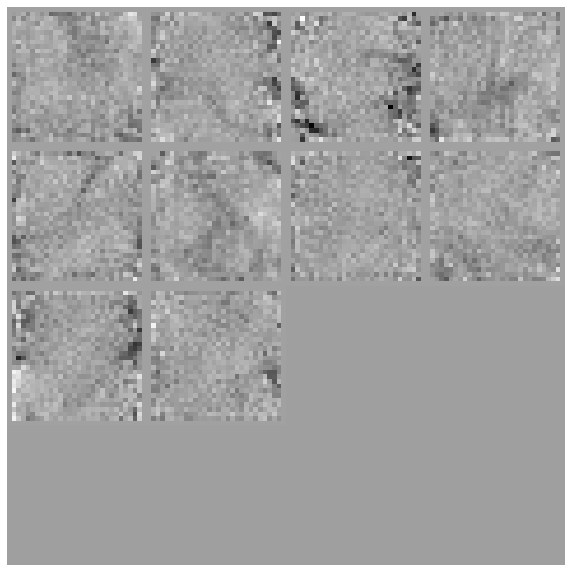

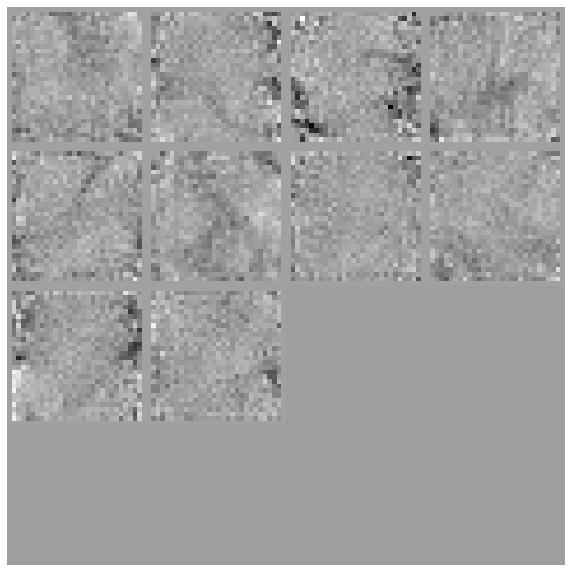

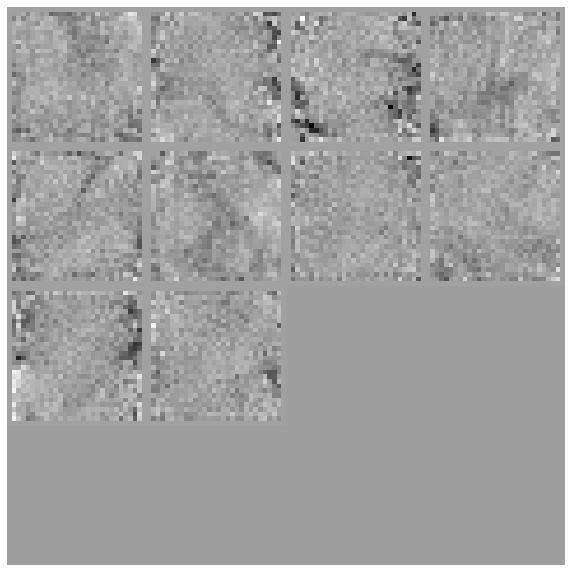

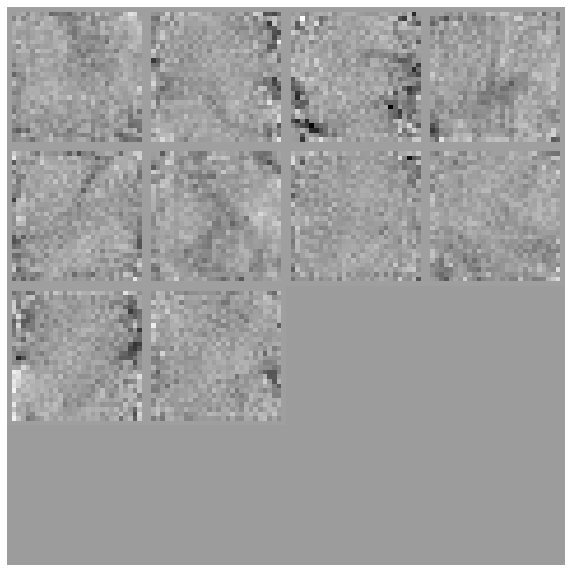

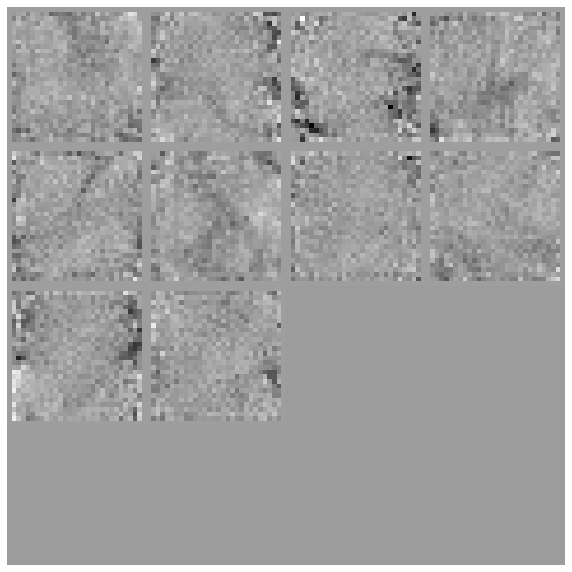

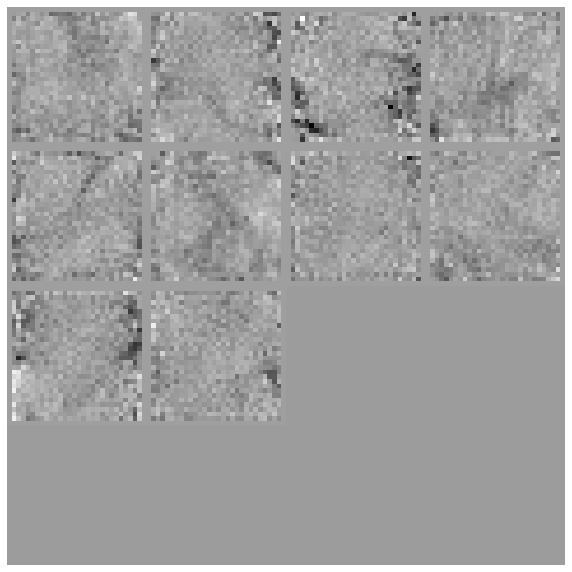

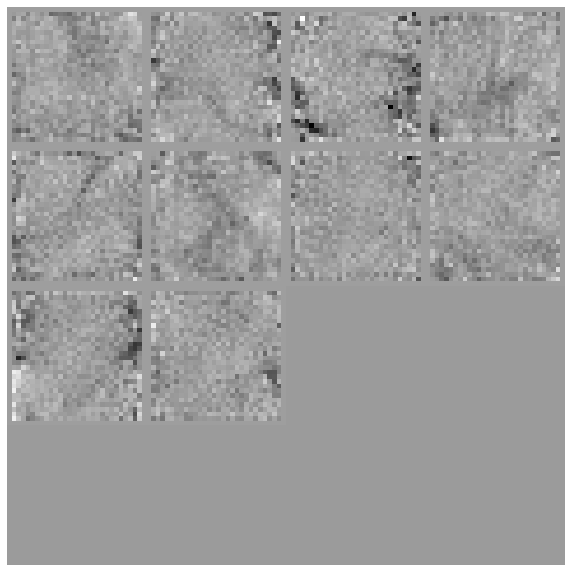

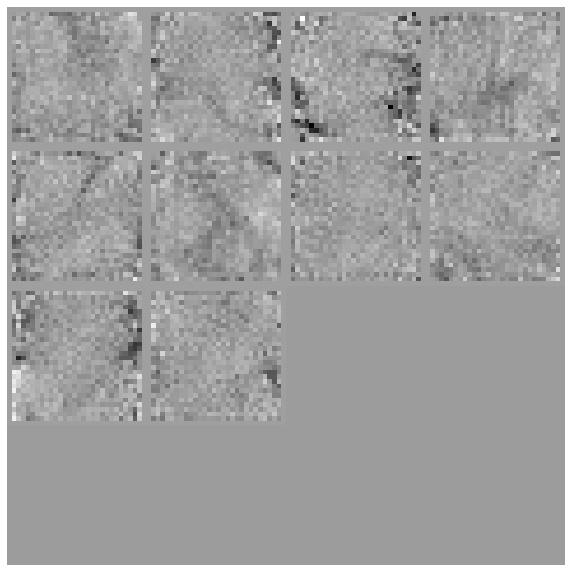

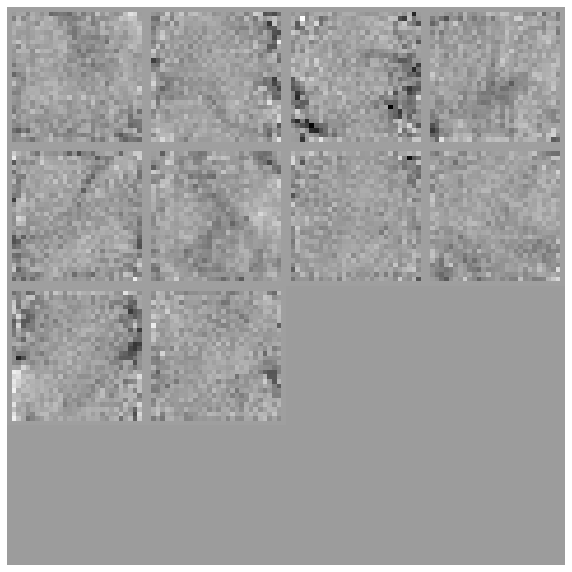

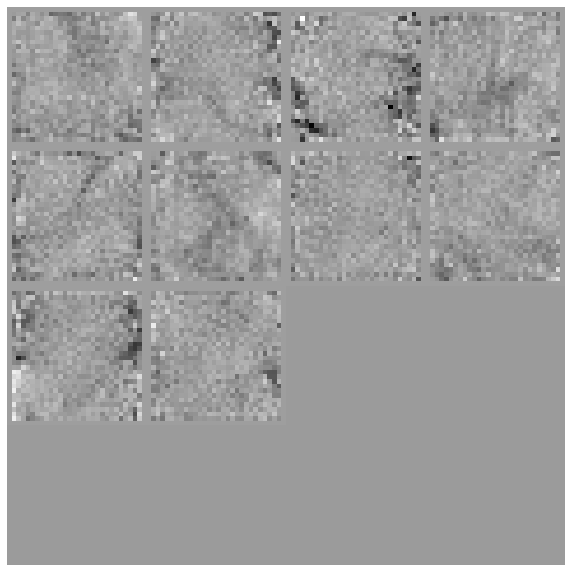

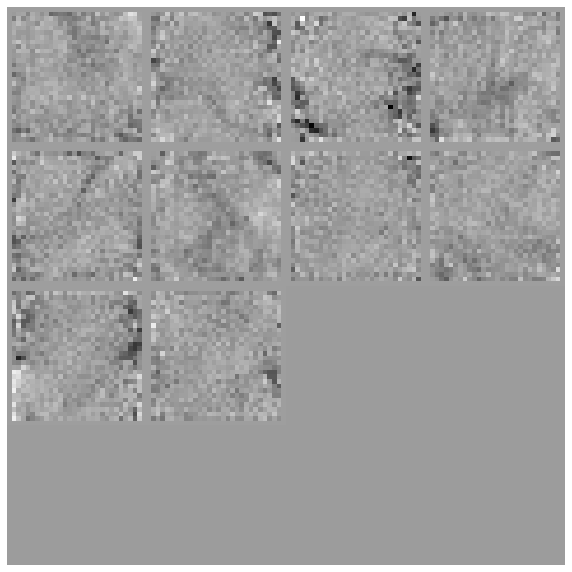

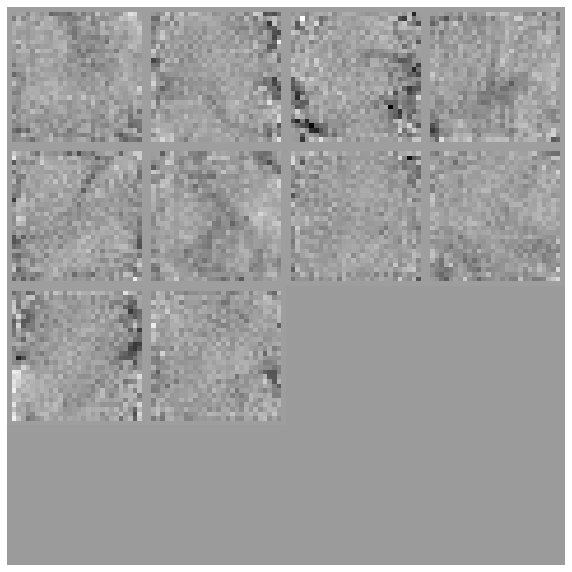

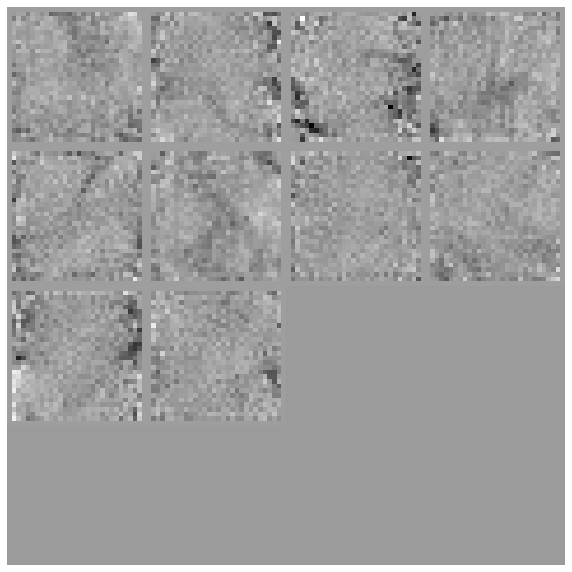

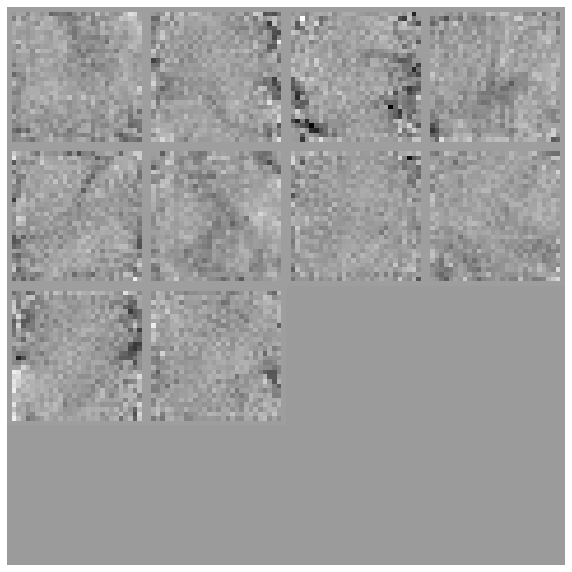

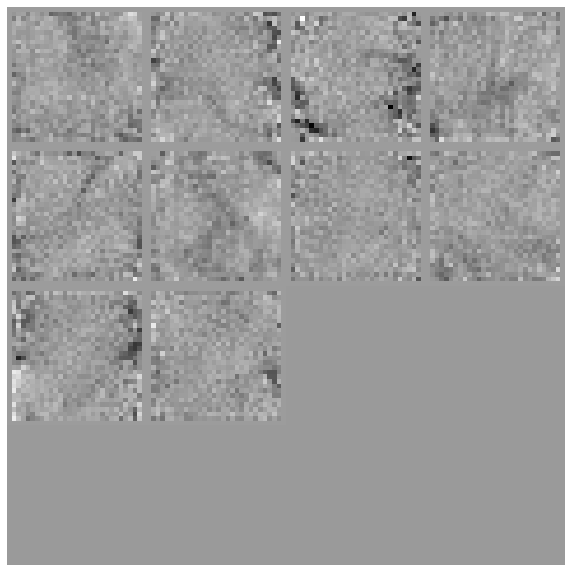

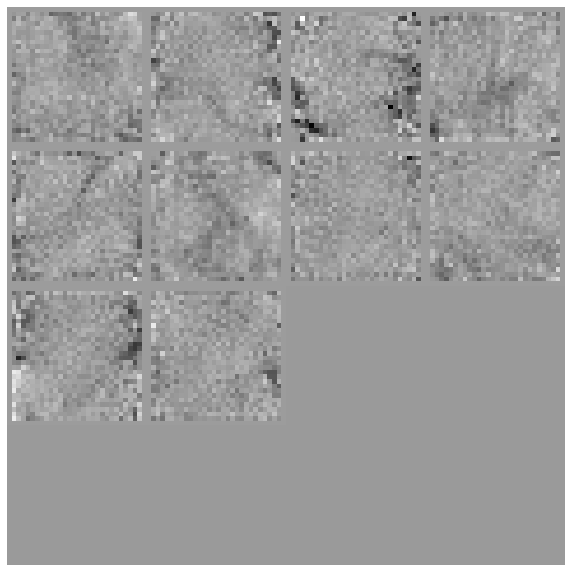

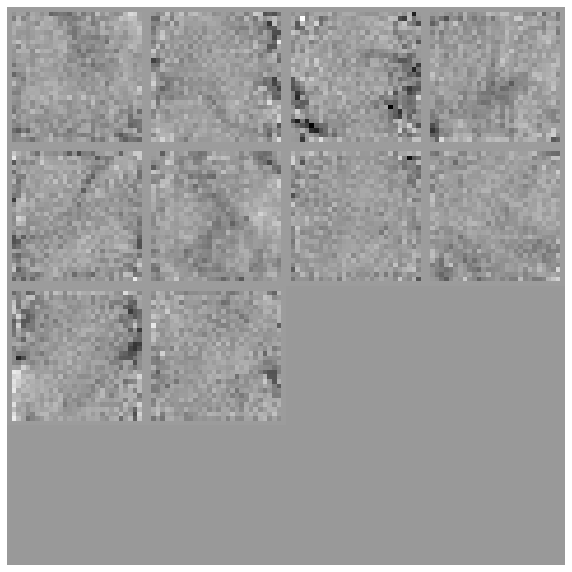

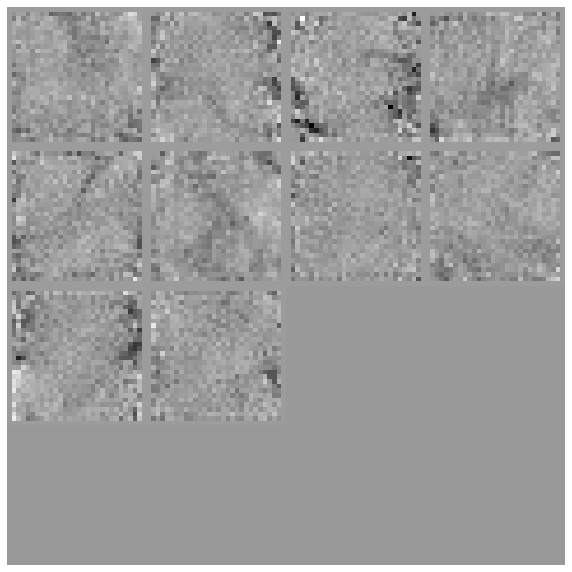

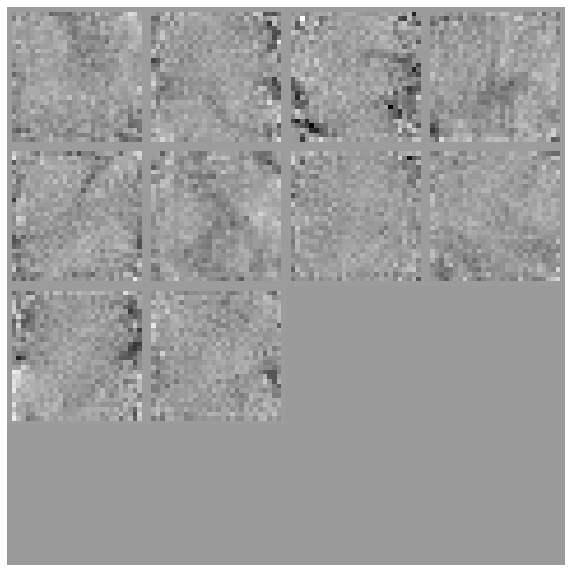

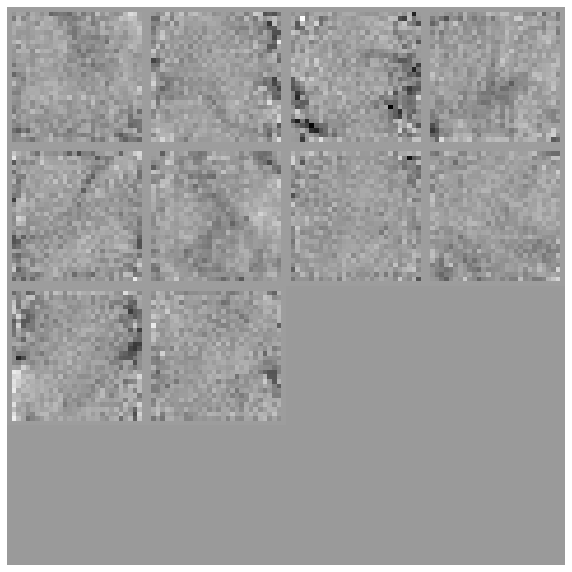

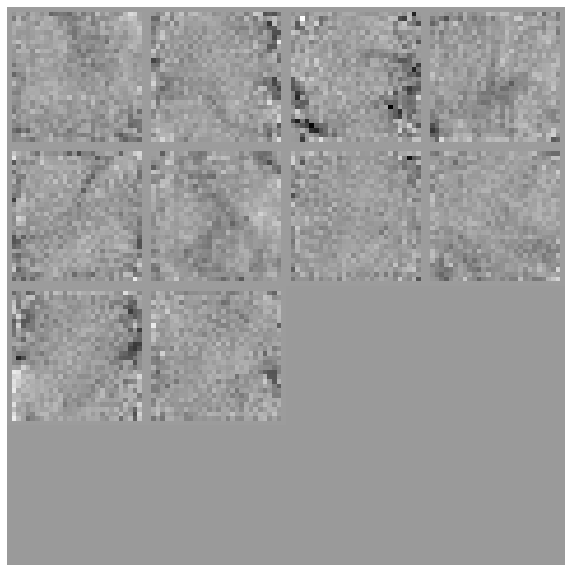

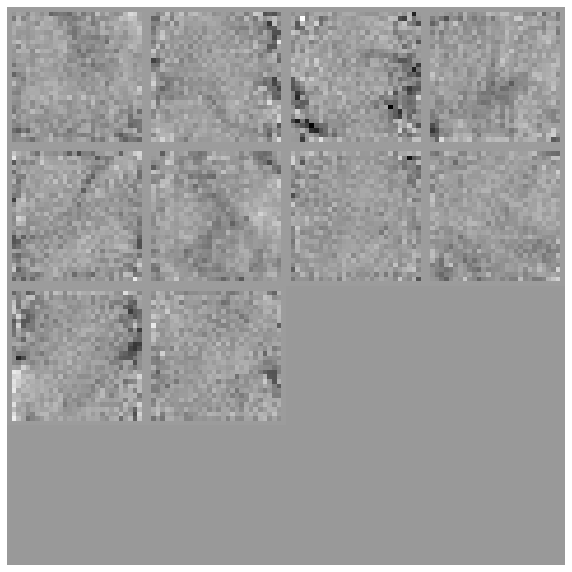

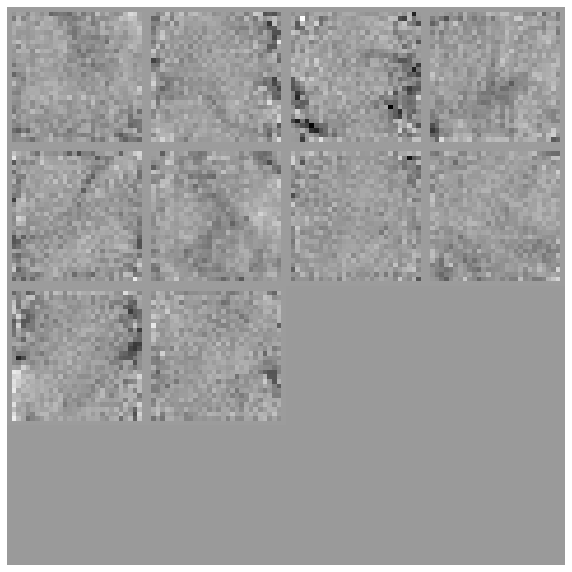

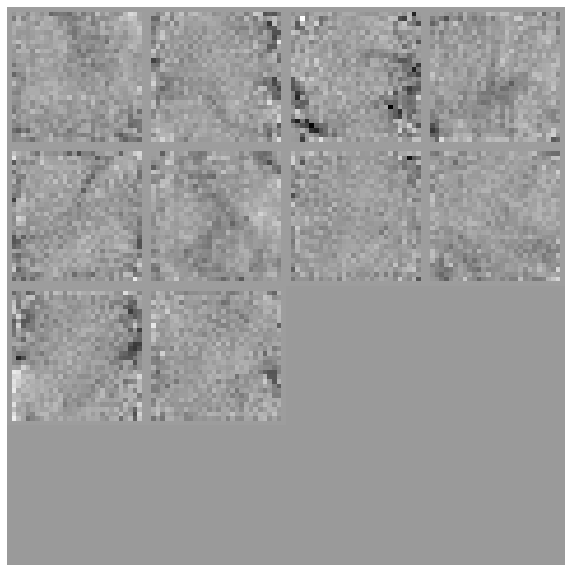

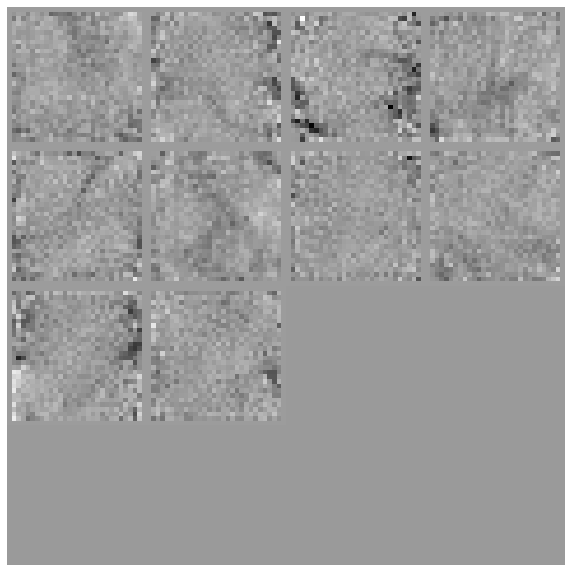

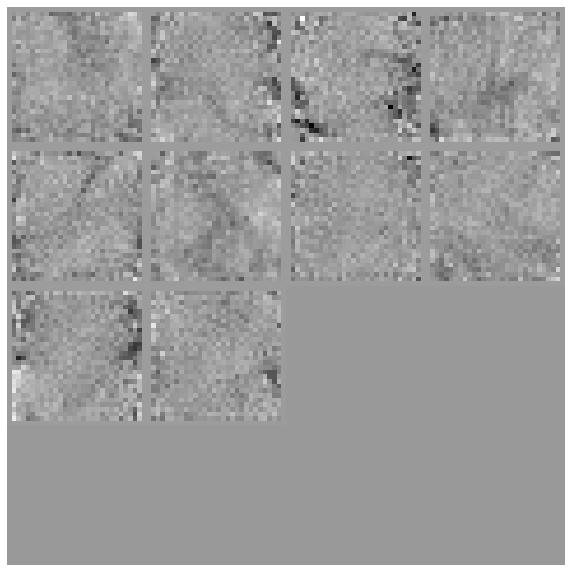

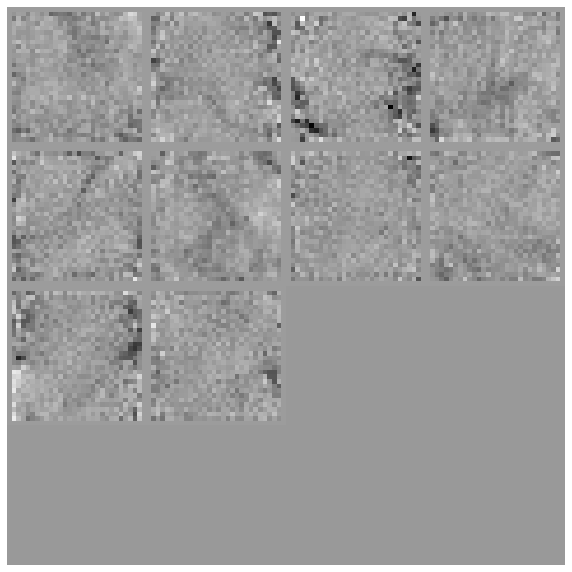

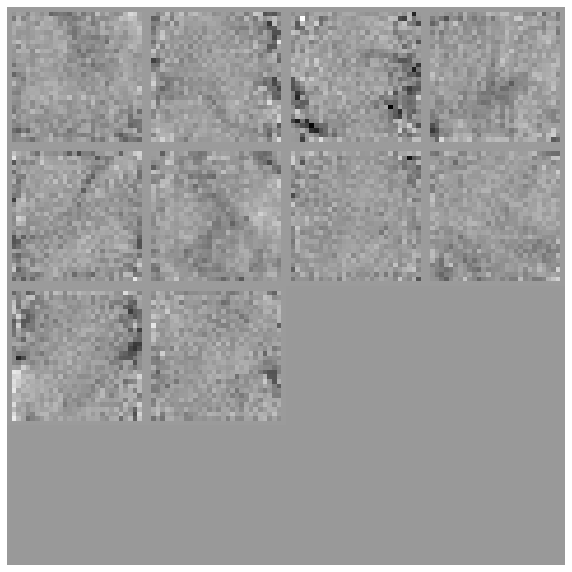

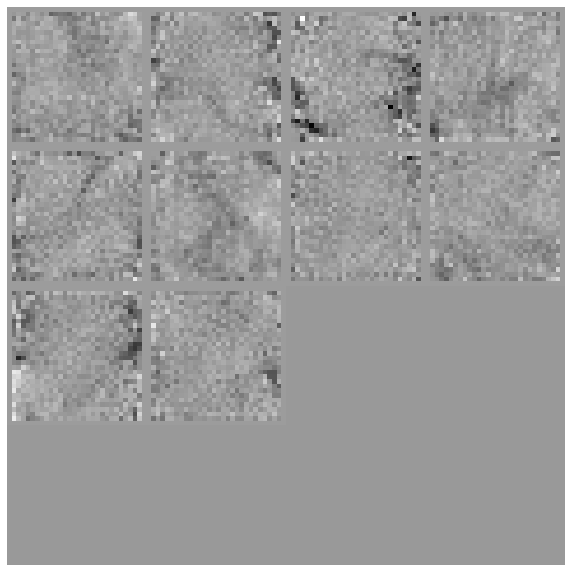

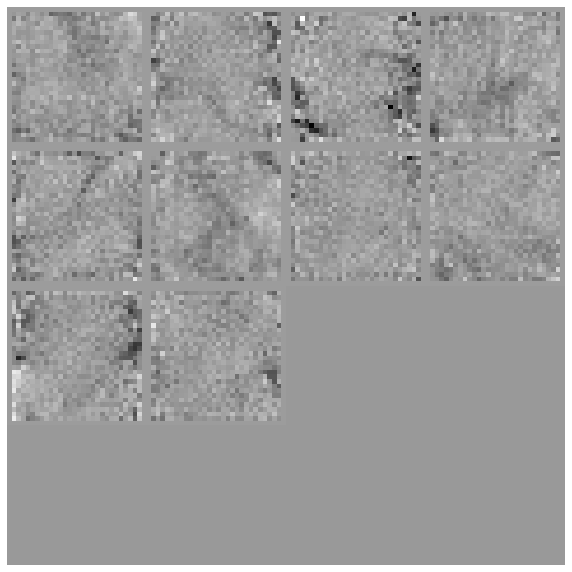

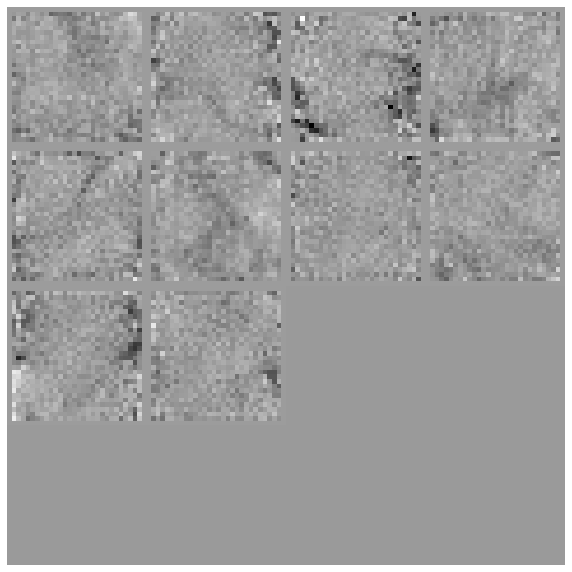

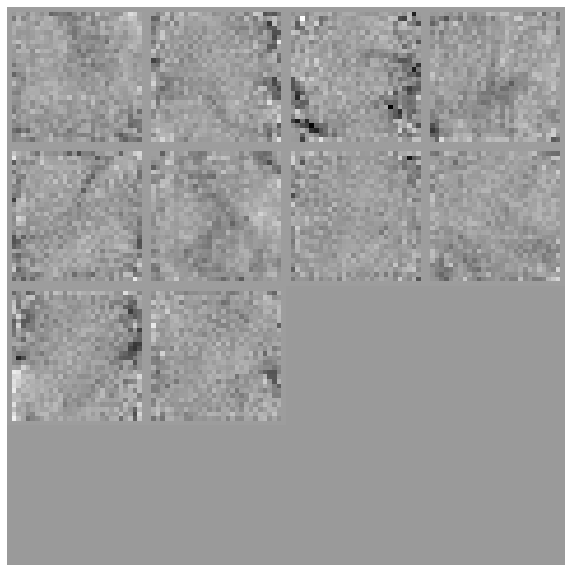

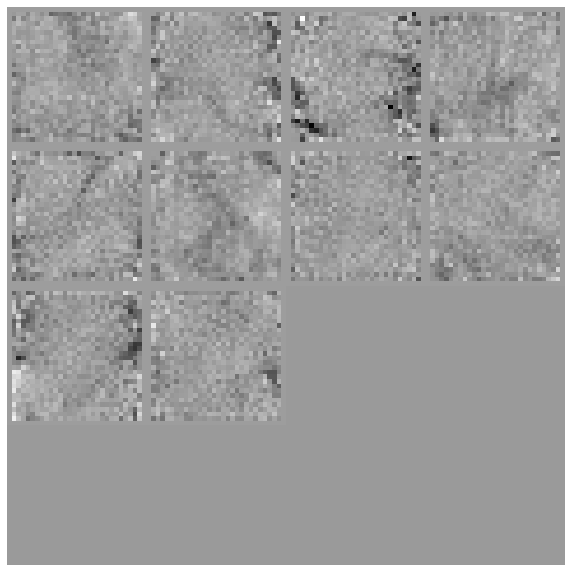

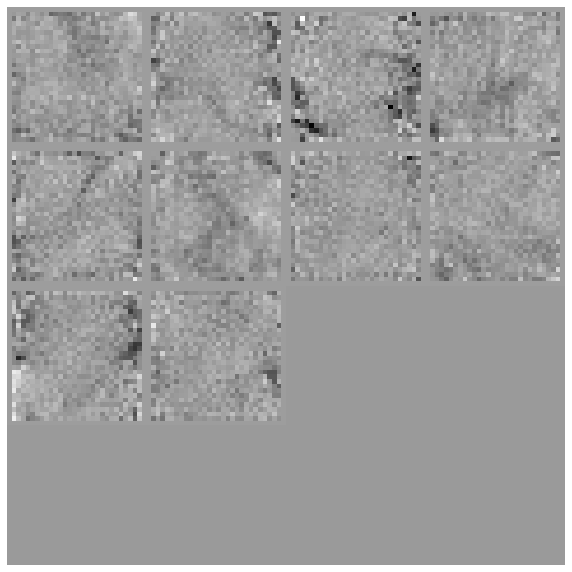

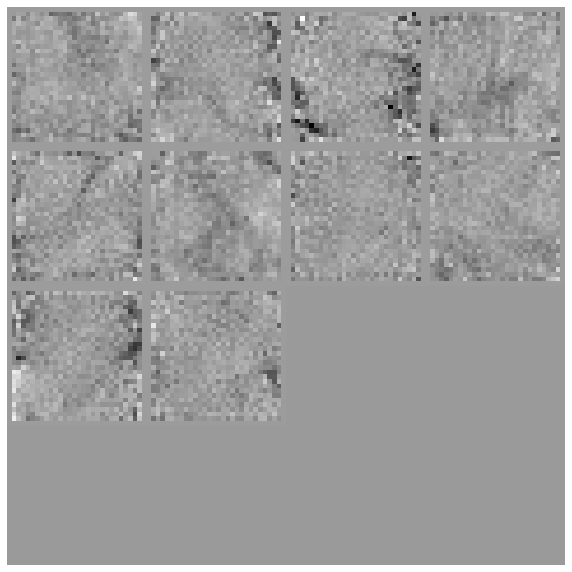

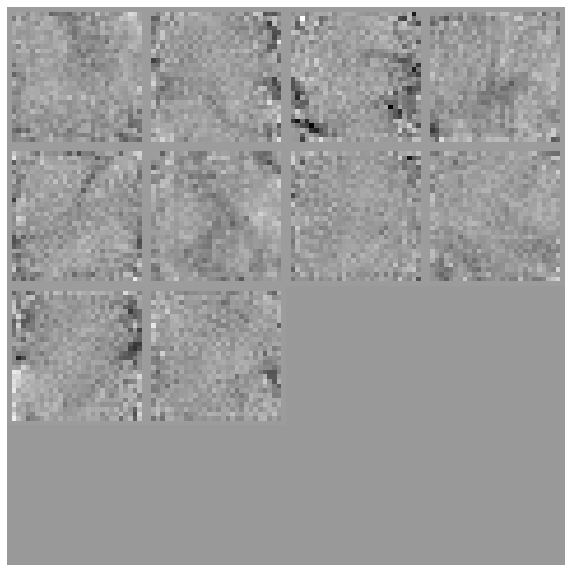

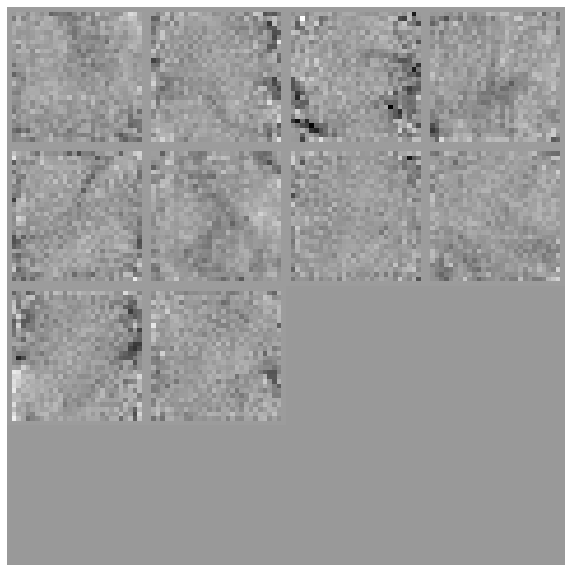

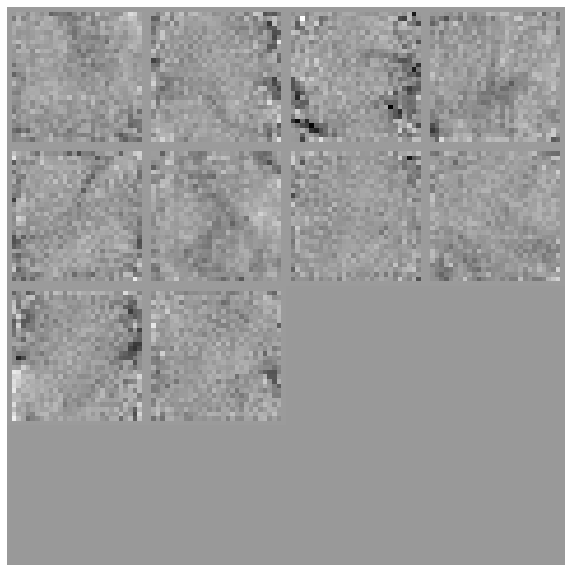

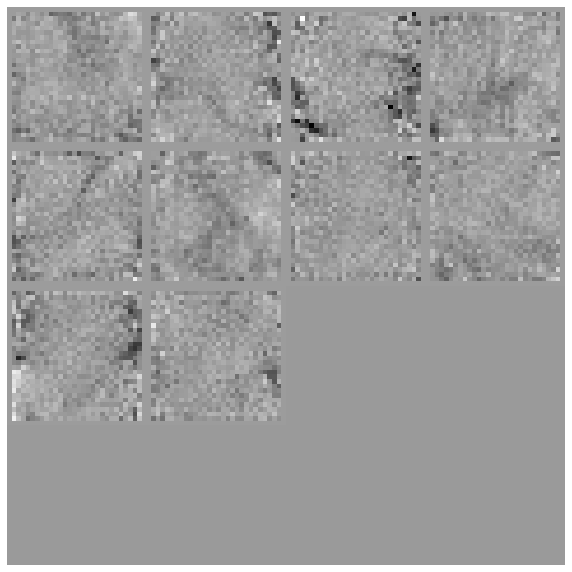

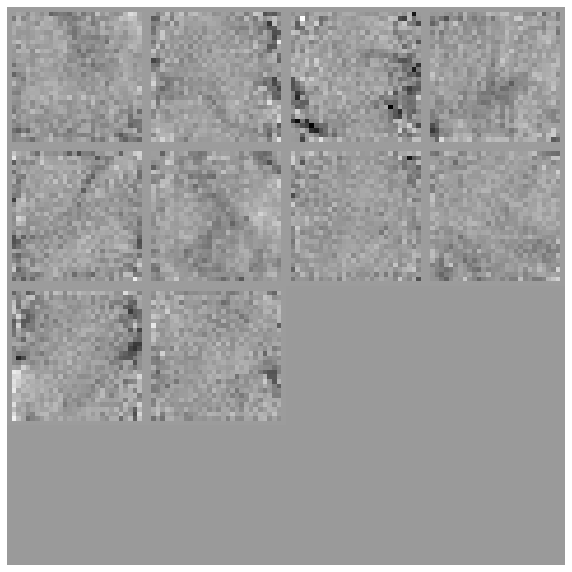

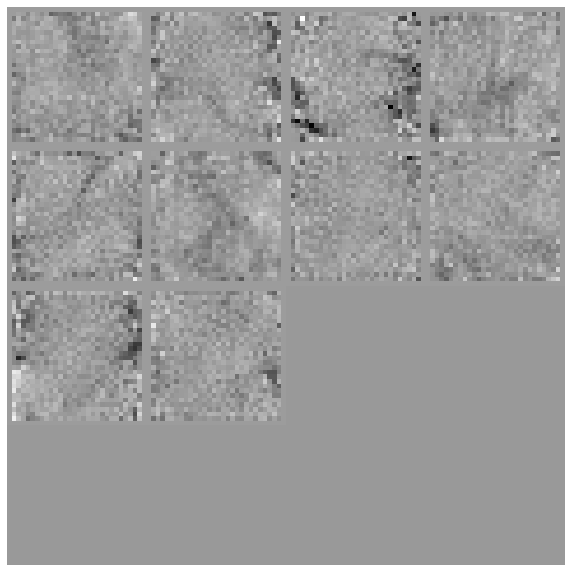

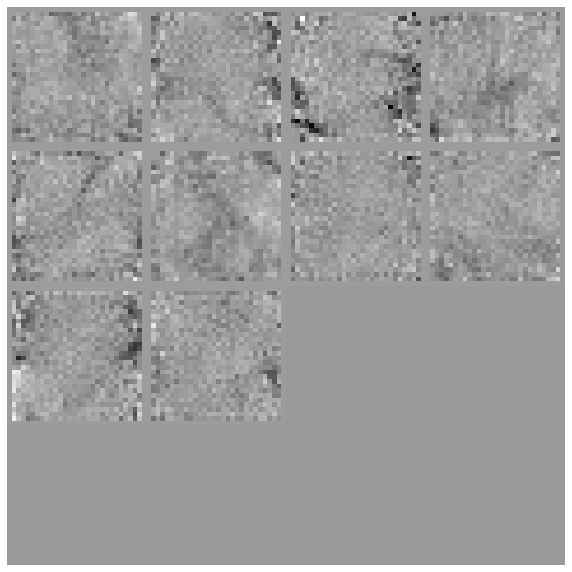

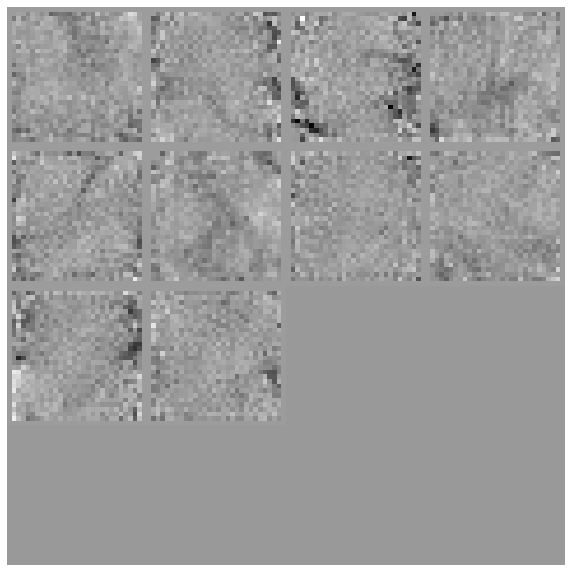

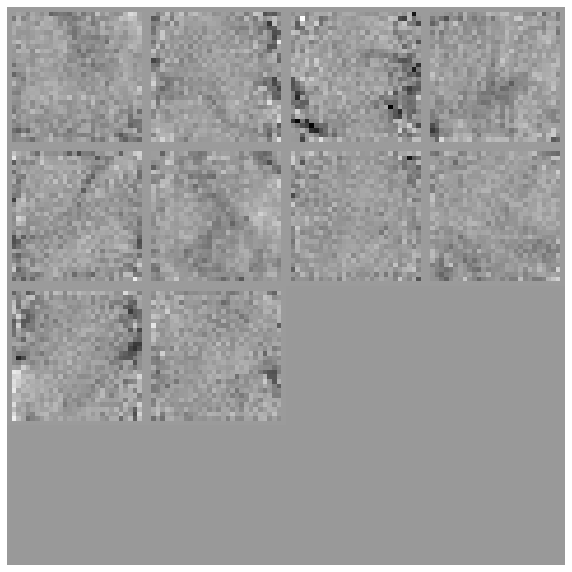

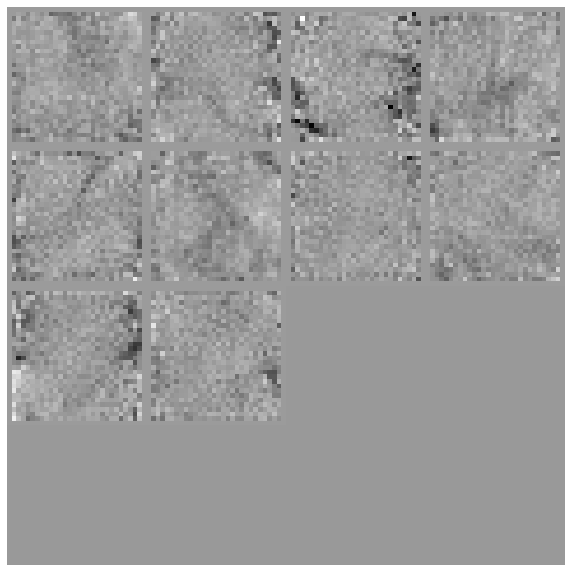

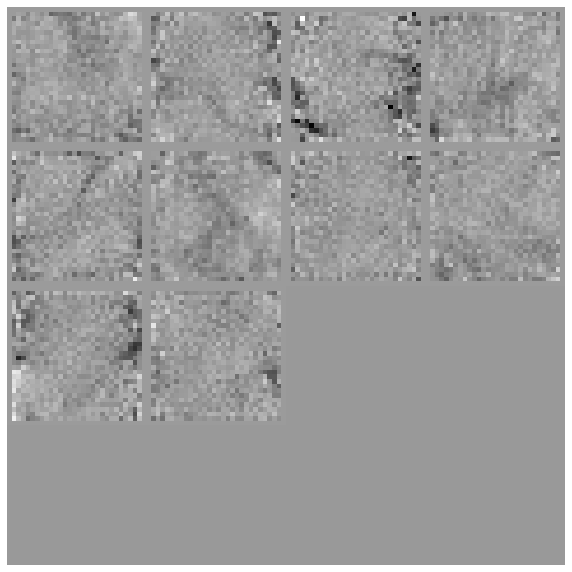

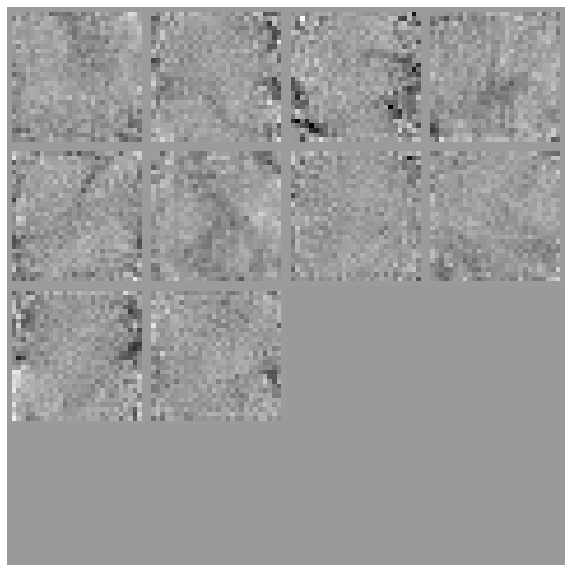

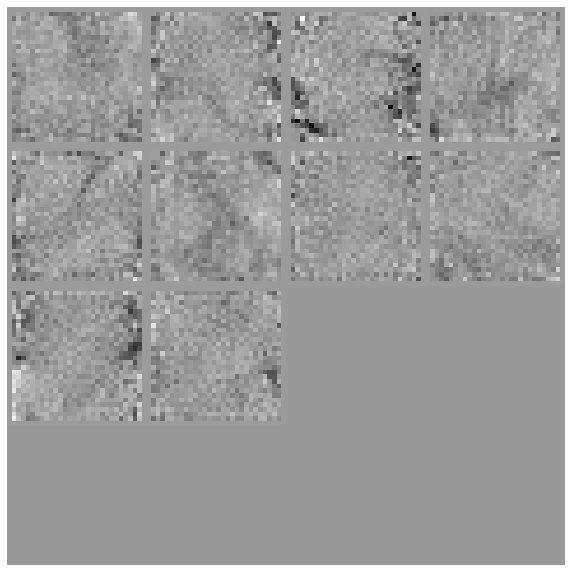

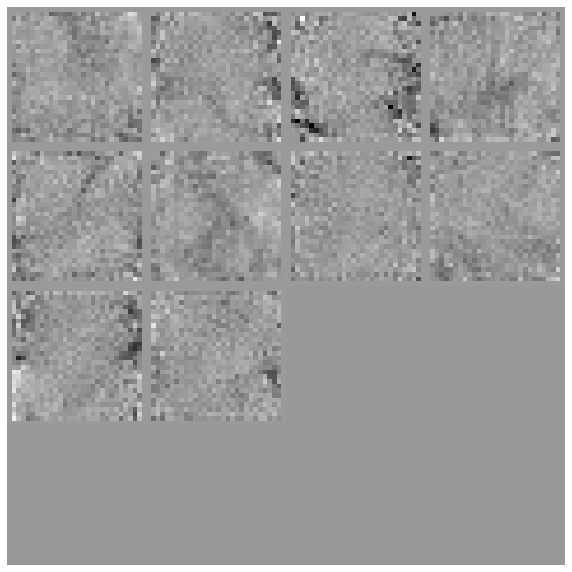

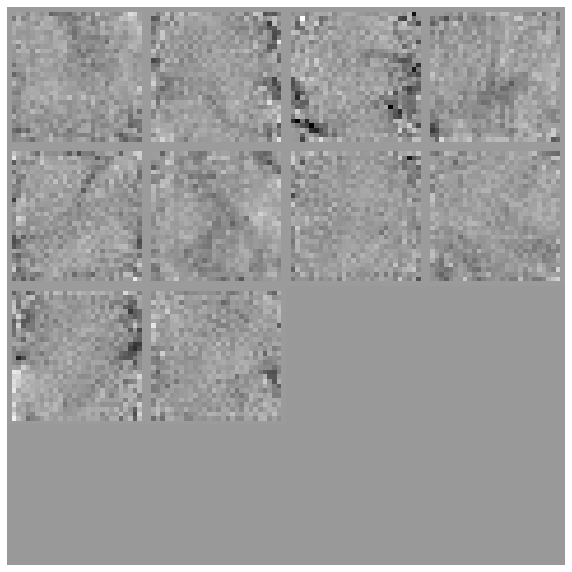

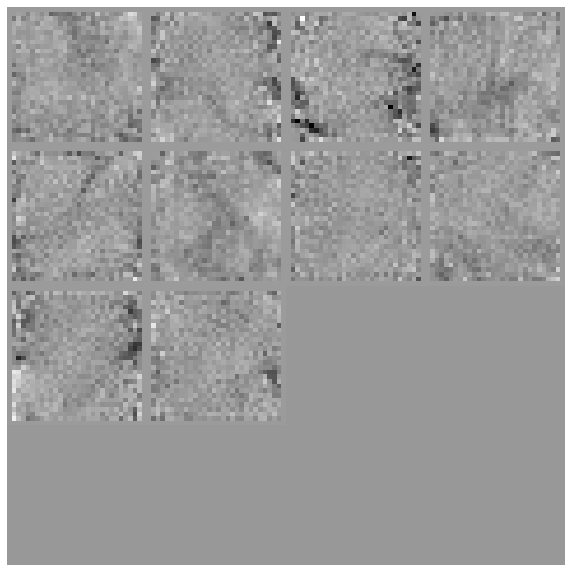

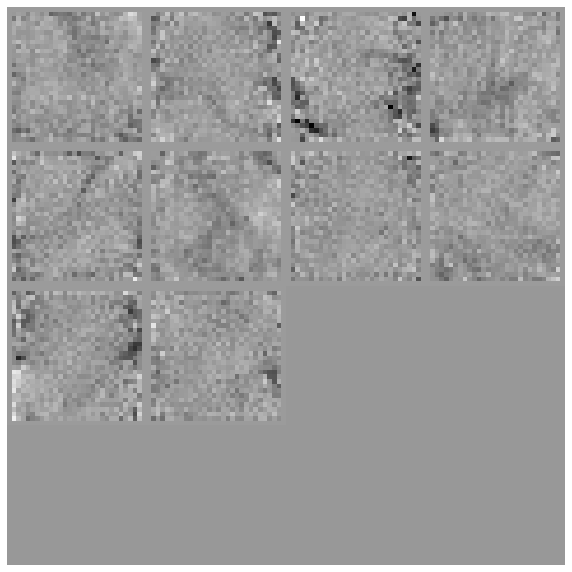

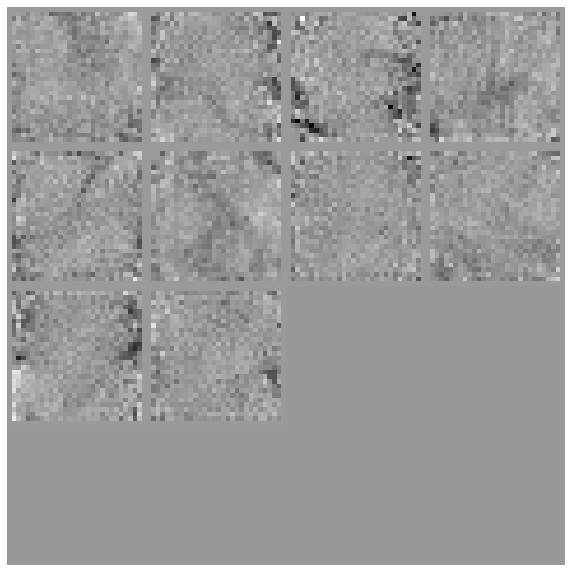

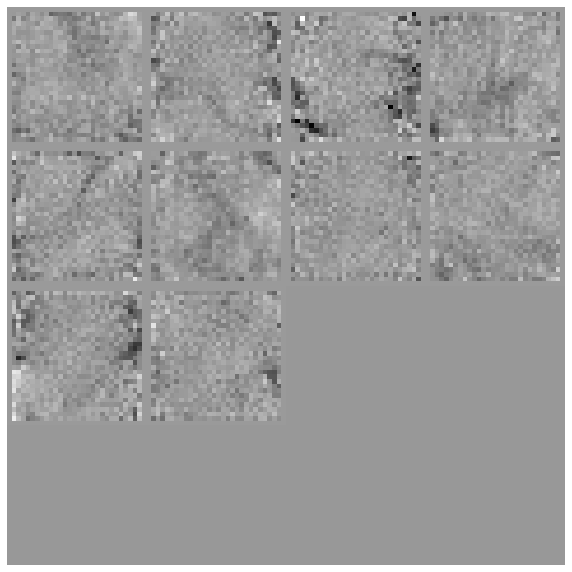

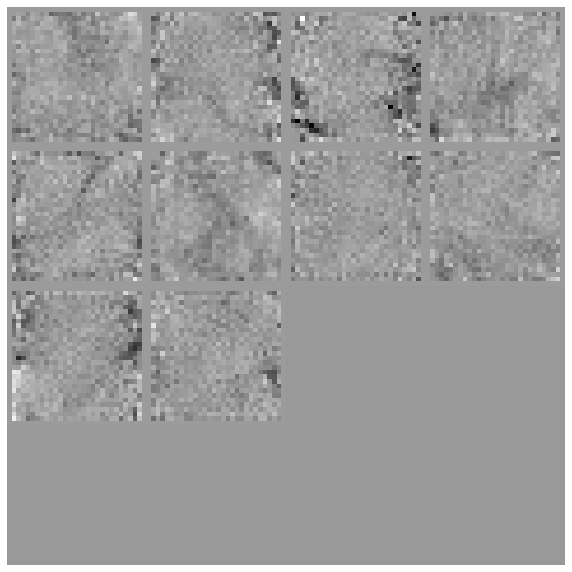

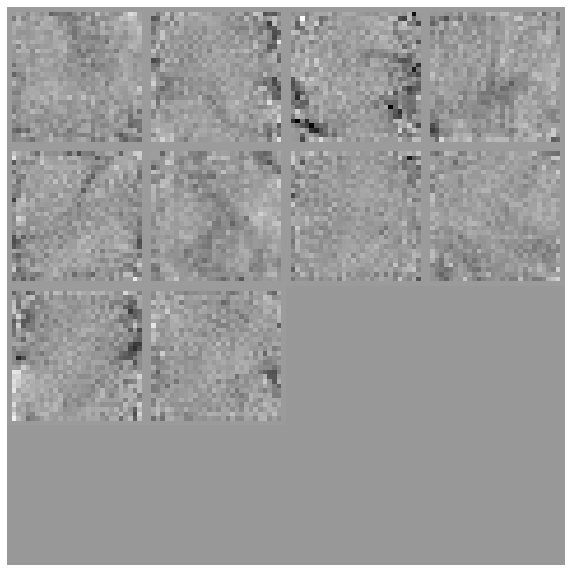

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024 #quiz size
c.epochs = 100000 #improve accuracy

w = [GPU(Truncated_Normal((784,10)))] #start model randominly

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing